# Explantory Data Analysis

# Imports


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import holidays
import seaborn as sns
import numpy as np

# Data upload 

In [2]:
shop_data=pd.read_csv('../../raw_data/shop_data_cleaned.csv')
shop_data=shop_data.drop(columns=['Unnamed: 0'], axis=1)
shop_data.head()

,Day,orders,total_sales
0,2021-07-01,10,414.85
1,2021-07-02,6,229.95
2,2021-07-03,10,459.89
3,2021-07-04,17,508.36
4,2021-07-05,13,399.88


In [3]:
google_data=pd.read_csv('../../raw_data/google_data_cleaned.csv')
google_data=google_data.drop(columns=['Unnamed: 0'], axis=1)
google_data.head()

,Day,google_costs,google_impressions,google_clicks
0,2022-01-10,1.91,65,29
1,2021-08-05,2.61,62,24
2,2022-06-26,5.15,142,43
3,2023-07-10,215.64,8,398
4,2021-05-15,0.01,5,1


In [4]:
fb_data=pd.read_csv('../../raw_data/fb_data_cleaned.csv')
fb_data=fb_data.drop(columns=['Unnamed: 0'], axis=1)
fb_data.head()

,Day,fb_costs,fb_impressions,fb_clicks
0,2023-08-24,1487.41,386594,839
1,2023-08-23,1315.81,337607,841
2,2023-08-22,1335.84,340325,839
3,2023-08-21,2210.01,595105,1284
4,2023-08-20,2148.53,555740,1366


In [5]:
tt_data=pd.read_csv('../../raw_data/tt_data_complete.csv')
tt_data=tt_data.drop(columns=['Unnamed: 0'], axis=1)
tt_data.head()

,Date,Cost,Impression,Clicks (Destination)
0,2022-07-01,320.00,122647,627
1,2022-07-02,320.00,111337,624
2,2022-07-03,368.29,137325,667
3,2022-07-04,418.56,158848,885
4,2022-07-05,420.00,178959,1011


In [6]:
df=pd.read_csv('../../raw_data/df_raw_data.csv')
df=df.drop(columns=['Unnamed: 0'], axis=1)
df.head()

,Day,orders,total_sales,fb_costs,fb_impressions,fb_clicks,google_costs,google_impressions,google_clicks,tt_costs,tt_impressions,tt_clicks
0,2021-07-01,10,414.85,257.01,36200.0,129.0,1.17,39.0,20.0,NaN,NaN,NaN
1,2021-07-02,6,229.95,250.30,33040.0,150.0,0.84,14.0,7.0,NaN,NaN,NaN
2,2021-07-03,10,459.89,248.59,33031.0,129.0,0.72,12.0,6.0,NaN,NaN,NaN
3,2021-07-04,17,508.36,258.05,37463.0,119.0,0.07,13.0,5.0,NaN,NaN,NaN
4,2021-07-05,13,399.88,257.47,35963.0,142.0,0.38,34.0,16.0,NaN,NaN,NaN


# Var creation

In [7]:
#total spend creation 
channels_spend = ["tt_costs", "fb_costs", "google_costs"]
df["Total_Spend"] = df[channels_spend].sum(axis=1)
df

,Day,orders,total_sales,fb_costs,fb_impressions,fb_clicks,google_costs,google_impressions,google_clicks,tt_costs,tt_impressions,tt_clicks,Total_Spend
0,2021-07-01,10,414.85,257.01,36200.0,129.0,1.17,39.0,20.0,NaN,NaN,NaN,258.18
1,2021-07-02,6,229.95,250.30,33040.0,150.0,0.84,14.0,7.0,NaN,NaN,NaN,251.14
2,2021-07-03,10,459.89,248.59,33031.0,129.0,0.72,12.0,6.0,NaN,NaN,NaN,249.31
3,2021-07-04,17,508.36,258.05,37463.0,119.0,0.07,13.0,5.0,NaN,NaN,NaN,258.12
4,2021-07-05,13,399.88,257.47,35963.0,142.0,0.38,34.0,16.0,NaN,NaN,NaN,257.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,2023-08-20,294,13616.97,2148.53,555740.0,1366.0,466.56,70.0,801.0,368.86,199939.0,644.0,2983.95
781,2023-08-21,356,15348.42,2210.01,595105.0,1284.0,400.58,51.0,782.0,391.14,186956.0,494.0,3001.73
782,2023-08-22,150,6054.53,1335.84,340325.0,839.0,289.46,50.0,619.0,218.61,134032.0,398.0,1843.91
783,2023-08-23,130,4810.67,1315.81,337607.0,841.0,275.86,52.0,537.0,90.21,43483.0,133.0,1681.88


In [8]:
#return on invesment column
df['ROI']=df['total_sales']/ df['Total_Spend']
df

,Day,orders,total_sales,fb_costs,fb_impressions,fb_clicks,google_costs,google_impressions,google_clicks,tt_costs,tt_impressions,tt_clicks,Total_Spend,ROI
0,2021-07-01,10,414.85,257.01,36200.0,129.0,1.17,39.0,20.0,NaN,NaN,NaN,258.18,1.606825
1,2021-07-02,6,229.95,250.30,33040.0,150.0,0.84,14.0,7.0,NaN,NaN,NaN,251.14,0.915625
2,2021-07-03,10,459.89,248.59,33031.0,129.0,0.72,12.0,6.0,NaN,NaN,NaN,249.31,1.844651
3,2021-07-04,17,508.36,258.05,37463.0,119.0,0.07,13.0,5.0,NaN,NaN,NaN,258.12,1.969472
4,2021-07-05,13,399.88,257.47,35963.0,142.0,0.38,34.0,16.0,NaN,NaN,NaN,257.85,1.550824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,2023-08-20,294,13616.97,2148.53,555740.0,1366.0,466.56,70.0,801.0,368.86,199939.0,644.0,2983.95,4.563404
781,2023-08-21,356,15348.42,2210.01,595105.0,1284.0,400.58,51.0,782.0,391.14,186956.0,494.0,3001.73,5.113191
782,2023-08-22,150,6054.53,1335.84,340325.0,839.0,289.46,50.0,619.0,218.61,134032.0,398.0,1843.91,3.283528
783,2023-08-23,130,4810.67,1315.81,337607.0,841.0,275.86,52.0,537.0,90.21,43483.0,133.0,1681.88,2.860293


## adding time var  

In [9]:
df["Day"]=pd.to_datetime(df["Day"])

In [10]:
#jan_season value to check if in Jan new year resolutions sales increase
df["Jan_Season"]=df["Day"].dt.month.isin([1]).astype(int)
df


,Day,orders,total_sales,fb_costs,fb_impressions,fb_clicks,google_costs,google_impressions,google_clicks,tt_costs,tt_impressions,tt_clicks,Total_Spend,ROI,Jan_Season
0,2021-07-01,10,414.85,257.01,36200.0,129.0,1.17,39.0,20.0,NaN,NaN,NaN,258.18,1.606825,0
1,2021-07-02,6,229.95,250.30,33040.0,150.0,0.84,14.0,7.0,NaN,NaN,NaN,251.14,0.915625,0
2,2021-07-03,10,459.89,248.59,33031.0,129.0,0.72,12.0,6.0,NaN,NaN,NaN,249.31,1.844651,0
3,2021-07-04,17,508.36,258.05,37463.0,119.0,0.07,13.0,5.0,NaN,NaN,NaN,258.12,1.969472,0
4,2021-07-05,13,399.88,257.47,35963.0,142.0,0.38,34.0,16.0,NaN,NaN,NaN,257.85,1.550824,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,2023-08-20,294,13616.97,2148.53,555740.0,1366.0,466.56,70.0,801.0,368.86,199939.0,644.0,2983.95,4.563404,0
781,2023-08-21,356,15348.42,2210.01,595105.0,1284.0,400.58,51.0,782.0,391.14,186956.0,494.0,3001.73,5.113191,0
782,2023-08-22,150,6054.53,1335.84,340325.0,839.0,289.46,50.0,619.0,218.61,134032.0,398.0,1843.91,3.283528,0
783,2023-08-23,130,4810.67,1315.81,337607.0,841.0,275.86,52.0,537.0,90.21,43483.0,133.0,1681.88,2.860293,0


In [11]:
# Adding holiday calendar 2022 & 2023 Germany to see if holidays influnce more or less on the total sales
holidays.Germany(years=[2022,2023]).keys()
df["holidays"]=df["Day"].isin(holidays.Germany(years=[2021,2022,2023]).keys()).astype(int)
df

,Day,orders,total_sales,fb_costs,fb_impressions,fb_clicks,google_costs,google_impressions,google_clicks,tt_costs,tt_impressions,tt_clicks,Total_Spend,ROI,Jan_Season,holidays
0,2021-07-01,10,414.85,257.01,36200.0,129.0,1.17,39.0,20.0,NaN,NaN,NaN,258.18,1.606825,0,0
1,2021-07-02,6,229.95,250.30,33040.0,150.0,0.84,14.0,7.0,NaN,NaN,NaN,251.14,0.915625,0,0
2,2021-07-03,10,459.89,248.59,33031.0,129.0,0.72,12.0,6.0,NaN,NaN,NaN,249.31,1.844651,0,0
3,2021-07-04,17,508.36,258.05,37463.0,119.0,0.07,13.0,5.0,NaN,NaN,NaN,258.12,1.969472,0,0
4,2021-07-05,13,399.88,257.47,35963.0,142.0,0.38,34.0,16.0,NaN,NaN,NaN,257.85,1.550824,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,2023-08-20,294,13616.97,2148.53,555740.0,1366.0,466.56,70.0,801.0,368.86,199939.0,644.0,2983.95,4.563404,0,0
781,2023-08-21,356,15348.42,2210.01,595105.0,1284.0,400.58,51.0,782.0,391.14,186956.0,494.0,3001.73,5.113191,0,0
782,2023-08-22,150,6054.53,1335.84,340325.0,839.0,289.46,50.0,619.0,218.61,134032.0,398.0,1843.91,3.283528,0,0
783,2023-08-23,130,4810.67,1315.81,337607.0,841.0,275.86,52.0,537.0,90.21,43483.0,133.0,1681.88,2.860293,0,0


In [12]:
#end and start of the month variable people after erecieving their salary are willing to spend more money
df["Month_end_start"]=df["Day"].dt.is_month_end.astype(int) + df["Day"].dt.is_month_start.astype(int)
df

,Day,orders,total_sales,fb_costs,fb_impressions,fb_clicks,google_costs,google_impressions,google_clicks,tt_costs,tt_impressions,tt_clicks,Total_Spend,ROI,Jan_Season,holidays,Month_end_start
0,2021-07-01,10,414.85,257.01,36200.0,129.0,1.17,39.0,20.0,NaN,NaN,NaN,258.18,1.606825,0,0,1
1,2021-07-02,6,229.95,250.30,33040.0,150.0,0.84,14.0,7.0,NaN,NaN,NaN,251.14,0.915625,0,0,0
2,2021-07-03,10,459.89,248.59,33031.0,129.0,0.72,12.0,6.0,NaN,NaN,NaN,249.31,1.844651,0,0,0
3,2021-07-04,17,508.36,258.05,37463.0,119.0,0.07,13.0,5.0,NaN,NaN,NaN,258.12,1.969472,0,0,0
4,2021-07-05,13,399.88,257.47,35963.0,142.0,0.38,34.0,16.0,NaN,NaN,NaN,257.85,1.550824,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,2023-08-20,294,13616.97,2148.53,555740.0,1366.0,466.56,70.0,801.0,368.86,199939.0,644.0,2983.95,4.563404,0,0,0
781,2023-08-21,356,15348.42,2210.01,595105.0,1284.0,400.58,51.0,782.0,391.14,186956.0,494.0,3001.73,5.113191,0,0,0
782,2023-08-22,150,6054.53,1335.84,340325.0,839.0,289.46,50.0,619.0,218.61,134032.0,398.0,1843.91,3.283528,0,0,0
783,2023-08-23,130,4810.67,1315.81,337607.0,841.0,275.86,52.0,537.0,90.21,43483.0,133.0,1681.88,2.860293,0,0,0


In [13]:
tt_data=tt_data.rename(columns={'Date':'Day', 'Cost':'tt_costs', 'Impression':'tt_impressions', 'Clicks(Destinatio)':'tt_clicks'})

In [14]:
tt_data=tt_data.rename(columns={'Clicks (Destination)':'tt_clicks'})

In [15]:
tt_data

,Day,tt_costs,tt_impressions,tt_clicks
0,2022-07-01,320.00,122647,627
1,2022-07-02,320.00,111337,624
2,2022-07-03,368.29,137325,667
3,2022-07-04,418.56,158848,885
4,2022-07-05,420.00,178959,1011
...,...,...,...,...
596,2022-12-27,0.00,0,0
597,2022-12-28,0.00,0,0
598,2022-12-29,0.00,0,0
599,2022-12-30,14.48,5123,18


In [16]:
df["working_day"]=0
df.loc[df["Day"].dt.weekday<5,"working_day"]=1


In [17]:
fb_data['fb_cpc']=fb_data['fb_costs']/fb_data['fb_clicks']
tt_data['tt_cpc']=tt_data['tt_costs']/tt_data['tt_clicks']
google_data['google_cpc']=google_data['google_costs']/google_data['google_clicks']

In [18]:
fb_data['fb_cpm']=(fb_data['fb_costs']/fb_data['fb_impressions'])*1000
tt_data['tt_cpm']=(tt_data['tt_costs']/tt_data['tt_impressions'])*1000
google_data['google_cpm']=(google_data['google_costs']/google_data['google_impressions'])*1000

In [19]:
df['fb_cpc']=df['fb_costs']/df['fb_clicks']
df['tt_cpc']=df['tt_costs']/df['tt_clicks']
df['google_cpc']=df['google_costs']/df['google_clicks']

In [20]:
df['fb_cpm']=(df['fb_costs']/df['fb_impressions'])*1000
df['tt_cpm']=(df['tt_costs']/df['tt_impressions'])*1000
df['google_cpm']=(df['google_costs']/df['google_impressions'])*1000

In [21]:
df['Total_clicks'] = df[["tt_clicks", "fb_clicks", "google_clicks"]].sum(axis=1)

In [22]:
df

,Day,orders,total_sales,fb_costs,fb_impressions,fb_clicks,google_costs,google_impressions,google_clicks,tt_costs,...,holidays,Month_end_start,working_day,fb_cpc,tt_cpc,google_cpc,fb_cpm,tt_cpm,google_cpm,Total_clicks
0,2021-07-01,10,414.85,257.01,36200.0,129.0,1.17,39.0,20.0,NaN,...,0,1,1,1.992326,NaN,0.058500,7.099724,NaN,30.000000,149.0
1,2021-07-02,6,229.95,250.30,33040.0,150.0,0.84,14.0,7.0,NaN,...,0,0,1,1.668667,NaN,0.120000,7.575666,NaN,60.000000,157.0
2,2021-07-03,10,459.89,248.59,33031.0,129.0,0.72,12.0,6.0,NaN,...,0,0,0,1.927054,NaN,0.120000,7.525960,NaN,60.000000,135.0
3,2021-07-04,17,508.36,258.05,37463.0,119.0,0.07,13.0,5.0,NaN,...,0,0,0,2.168487,NaN,0.014000,6.888130,NaN,5.384615,124.0
4,2021-07-05,13,399.88,257.47,35963.0,142.0,0.38,34.0,16.0,NaN,...,0,0,1,1.813169,NaN,0.023750,7.159303,NaN,11.176471,158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,2023-08-20,294,13616.97,2148.53,555740.0,1366.0,466.56,70.0,801.0,368.86,...,0,0,0,1.572862,0.572764,0.582472,3.866070,1.844863,6665.142857,2811.0
781,2023-08-21,356,15348.42,2210.01,595105.0,1284.0,400.58,51.0,782.0,391.14,...,0,0,1,1.721192,0.791781,0.512251,3.713647,2.092150,7854.509804,2560.0
782,2023-08-22,150,6054.53,1335.84,340325.0,839.0,289.46,50.0,619.0,218.61,...,0,0,1,1.592181,0.549271,0.467625,3.925189,1.631028,5789.200000,1856.0
783,2023-08-23,130,4810.67,1315.81,337607.0,841.0,275.86,52.0,537.0,90.21,...,0,0,1,1.564578,0.678271,0.513706,3.897461,2.074604,5305.000000,1511.0


In [23]:
df["Total_CPC"] = df['Total_Spend']/df['Total_clicks']

In [24]:
df

,Day,orders,total_sales,fb_costs,fb_impressions,fb_clicks,google_costs,google_impressions,google_clicks,tt_costs,...,Month_end_start,working_day,fb_cpc,tt_cpc,google_cpc,fb_cpm,tt_cpm,google_cpm,Total_clicks,Total_CPC
0,2021-07-01,10,414.85,257.01,36200.0,129.0,1.17,39.0,20.0,NaN,...,1,1,1.992326,NaN,0.058500,7.099724,NaN,30.000000,149.0,1.732752
1,2021-07-02,6,229.95,250.30,33040.0,150.0,0.84,14.0,7.0,NaN,...,0,1,1.668667,NaN,0.120000,7.575666,NaN,60.000000,157.0,1.599618
2,2021-07-03,10,459.89,248.59,33031.0,129.0,0.72,12.0,6.0,NaN,...,0,0,1.927054,NaN,0.120000,7.525960,NaN,60.000000,135.0,1.846741
3,2021-07-04,17,508.36,258.05,37463.0,119.0,0.07,13.0,5.0,NaN,...,0,0,2.168487,NaN,0.014000,6.888130,NaN,5.384615,124.0,2.081613
4,2021-07-05,13,399.88,257.47,35963.0,142.0,0.38,34.0,16.0,NaN,...,0,1,1.813169,NaN,0.023750,7.159303,NaN,11.176471,158.0,1.631962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,2023-08-20,294,13616.97,2148.53,555740.0,1366.0,466.56,70.0,801.0,368.86,...,0,0,1.572862,0.572764,0.582472,3.866070,1.844863,6665.142857,2811.0,1.061526
781,2023-08-21,356,15348.42,2210.01,595105.0,1284.0,400.58,51.0,782.0,391.14,...,0,1,1.721192,0.791781,0.512251,3.713647,2.092150,7854.509804,2560.0,1.172551
782,2023-08-22,150,6054.53,1335.84,340325.0,839.0,289.46,50.0,619.0,218.61,...,0,1,1.592181,0.549271,0.467625,3.925189,1.631028,5789.200000,1856.0,0.993486
783,2023-08-23,130,4810.67,1315.81,337607.0,841.0,275.86,52.0,537.0,90.21,...,0,1,1.564578,0.678271,0.513706,3.897461,2.074604,5305.000000,1511.0,1.113091


In [25]:
df['Total_social_impressions'] = df[["tt_impressions", "fb_impressions", ]].sum(axis=1)
df

,Day,orders,total_sales,fb_costs,fb_impressions,fb_clicks,google_costs,google_impressions,google_clicks,tt_costs,...,working_day,fb_cpc,tt_cpc,google_cpc,fb_cpm,tt_cpm,google_cpm,Total_clicks,Total_CPC,Total_social_impressions
0,2021-07-01,10,414.85,257.01,36200.0,129.0,1.17,39.0,20.0,NaN,...,1,1.992326,NaN,0.058500,7.099724,NaN,30.000000,149.0,1.732752,36200.0
1,2021-07-02,6,229.95,250.30,33040.0,150.0,0.84,14.0,7.0,NaN,...,1,1.668667,NaN,0.120000,7.575666,NaN,60.000000,157.0,1.599618,33040.0
2,2021-07-03,10,459.89,248.59,33031.0,129.0,0.72,12.0,6.0,NaN,...,0,1.927054,NaN,0.120000,7.525960,NaN,60.000000,135.0,1.846741,33031.0
3,2021-07-04,17,508.36,258.05,37463.0,119.0,0.07,13.0,5.0,NaN,...,0,2.168487,NaN,0.014000,6.888130,NaN,5.384615,124.0,2.081613,37463.0
4,2021-07-05,13,399.88,257.47,35963.0,142.0,0.38,34.0,16.0,NaN,...,1,1.813169,NaN,0.023750,7.159303,NaN,11.176471,158.0,1.631962,35963.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,2023-08-20,294,13616.97,2148.53,555740.0,1366.0,466.56,70.0,801.0,368.86,...,0,1.572862,0.572764,0.582472,3.866070,1.844863,6665.142857,2811.0,1.061526,755679.0
781,2023-08-21,356,15348.42,2210.01,595105.0,1284.0,400.58,51.0,782.0,391.14,...,1,1.721192,0.791781,0.512251,3.713647,2.092150,7854.509804,2560.0,1.172551,782061.0
782,2023-08-22,150,6054.53,1335.84,340325.0,839.0,289.46,50.0,619.0,218.61,...,1,1.592181,0.549271,0.467625,3.925189,1.631028,5789.200000,1856.0,0.993486,474357.0
783,2023-08-23,130,4810.67,1315.81,337607.0,841.0,275.86,52.0,537.0,90.21,...,1,1.564578,0.678271,0.513706,3.897461,2.074604,5305.000000,1511.0,1.113091,381090.0


In [26]:
df["Total_Social_CPM"] = (df['Total_Spend']/df['Total_social_impressions'])*1000
df

,Day,orders,total_sales,fb_costs,fb_impressions,fb_clicks,google_costs,google_impressions,google_clicks,tt_costs,...,fb_cpc,tt_cpc,google_cpc,fb_cpm,tt_cpm,google_cpm,Total_clicks,Total_CPC,Total_social_impressions,Total_Social_CPM
0,2021-07-01,10,414.85,257.01,36200.0,129.0,1.17,39.0,20.0,NaN,...,1.992326,NaN,0.058500,7.099724,NaN,30.000000,149.0,1.732752,36200.0,7.132044
1,2021-07-02,6,229.95,250.30,33040.0,150.0,0.84,14.0,7.0,NaN,...,1.668667,NaN,0.120000,7.575666,NaN,60.000000,157.0,1.599618,33040.0,7.601090
2,2021-07-03,10,459.89,248.59,33031.0,129.0,0.72,12.0,6.0,NaN,...,1.927054,NaN,0.120000,7.525960,NaN,60.000000,135.0,1.846741,33031.0,7.547758
3,2021-07-04,17,508.36,258.05,37463.0,119.0,0.07,13.0,5.0,NaN,...,2.168487,NaN,0.014000,6.888130,NaN,5.384615,124.0,2.081613,37463.0,6.889998
4,2021-07-05,13,399.88,257.47,35963.0,142.0,0.38,34.0,16.0,NaN,...,1.813169,NaN,0.023750,7.159303,NaN,11.176471,158.0,1.631962,35963.0,7.169869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,2023-08-20,294,13616.97,2148.53,555740.0,1366.0,466.56,70.0,801.0,368.86,...,1.572862,0.572764,0.582472,3.866070,1.844863,6665.142857,2811.0,1.061526,755679.0,3.948700
781,2023-08-21,356,15348.42,2210.01,595105.0,1284.0,400.58,51.0,782.0,391.14,...,1.721192,0.791781,0.512251,3.713647,2.092150,7854.509804,2560.0,1.172551,782061.0,3.838230
782,2023-08-22,150,6054.53,1335.84,340325.0,839.0,289.46,50.0,619.0,218.61,...,1.592181,0.549271,0.467625,3.925189,1.631028,5789.200000,1856.0,0.993486,474357.0,3.887178
783,2023-08-23,130,4810.67,1315.81,337607.0,841.0,275.86,52.0,537.0,90.21,...,1.564578,0.678271,0.513706,3.897461,2.074604,5305.000000,1511.0,1.113091,381090.0,4.413341


In [27]:
df.fillna(0, inplace=True)

# Data exploration based on time 

In [28]:
df

,Day,orders,total_sales,fb_costs,fb_impressions,fb_clicks,google_costs,google_impressions,google_clicks,tt_costs,...,fb_cpc,tt_cpc,google_cpc,fb_cpm,tt_cpm,google_cpm,Total_clicks,Total_CPC,Total_social_impressions,Total_Social_CPM
0,2021-07-01,10,414.85,257.01,36200.0,129.0,1.17,39.0,20.0,0.00,...,1.992326,0.000000,0.058500,7.099724,0.000000,30.000000,149.0,1.732752,36200.0,7.132044
1,2021-07-02,6,229.95,250.30,33040.0,150.0,0.84,14.0,7.0,0.00,...,1.668667,0.000000,0.120000,7.575666,0.000000,60.000000,157.0,1.599618,33040.0,7.601090
2,2021-07-03,10,459.89,248.59,33031.0,129.0,0.72,12.0,6.0,0.00,...,1.927054,0.000000,0.120000,7.525960,0.000000,60.000000,135.0,1.846741,33031.0,7.547758
3,2021-07-04,17,508.36,258.05,37463.0,119.0,0.07,13.0,5.0,0.00,...,2.168487,0.000000,0.014000,6.888130,0.000000,5.384615,124.0,2.081613,37463.0,6.889998
4,2021-07-05,13,399.88,257.47,35963.0,142.0,0.38,34.0,16.0,0.00,...,1.813169,0.000000,0.023750,7.159303,0.000000,11.176471,158.0,1.631962,35963.0,7.169869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,2023-08-20,294,13616.97,2148.53,555740.0,1366.0,466.56,70.0,801.0,368.86,...,1.572862,0.572764,0.582472,3.866070,1.844863,6665.142857,2811.0,1.061526,755679.0,3.948700
781,2023-08-21,356,15348.42,2210.01,595105.0,1284.0,400.58,51.0,782.0,391.14,...,1.721192,0.791781,0.512251,3.713647,2.092150,7854.509804,2560.0,1.172551,782061.0,3.838230
782,2023-08-22,150,6054.53,1335.84,340325.0,839.0,289.46,50.0,619.0,218.61,...,1.592181,0.549271,0.467625,3.925189,1.631028,5789.200000,1856.0,0.993486,474357.0,3.887178
783,2023-08-23,130,4810.67,1315.81,337607.0,841.0,275.86,52.0,537.0,90.21,...,1.564578,0.678271,0.513706,3.897461,2.074604,5305.000000,1511.0,1.113091,381090.0,4.413341


## days Friday Saturday

In [29]:
df.set_index('Day', inplace=True)

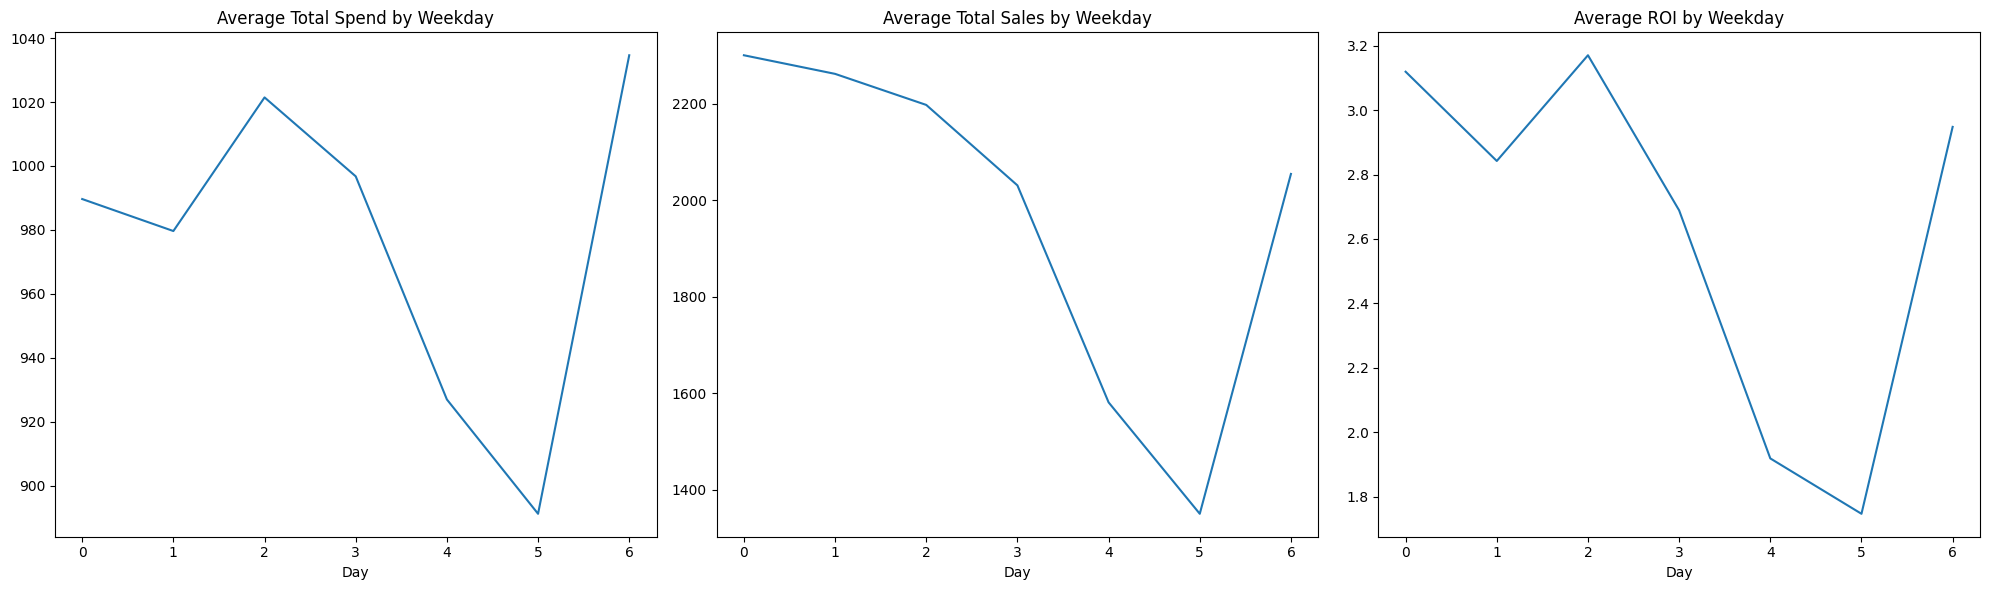

In [30]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
# Shows that on day 4 & 5 (fri, sat) of the week we have less transactions on average
df.groupby(df.index.dayofweek)["Total_Spend"].mean().plot()
plt.title("Average Total Spend by Weekday")

plt.subplot(1, 3, 2)
# Shows that on day 4 & 5 (fri, sat) of the week we have less total_sales on average
df.groupby(df.index.dayofweek)["total_sales"].mean().plot()
plt.title("Average Total Sales by Weekday")

plt.subplot(1, 3, 3)
# Shows that on day 4 & 5 (fri, sat) of the week we have less ROI on average
df.groupby(df.index.dayofweek)["ROI"].mean().plot()
plt.title("Average ROI by Weekday")

plt.tight_layout()  # Improves subplot spacing
plt.show()


Summary on friday and saturday there is less spends on adv but also less sales

# google

In [31]:
google_data

,Day,google_costs,google_impressions,google_clicks,google_cpc,google_cpm
0,2022-01-10,1.91,65,29,0.065862,29.384615
1,2021-08-05,2.61,62,24,0.108750,42.096774
2,2022-06-26,5.15,142,43,0.119767,36.267606
3,2023-07-10,215.64,8,398,0.541809,26955.000000
4,2021-05-15,0.01,5,1,0.010000,2.000000
...,...,...,...,...,...,...
1121,2022-01-04,0.28,40,15,0.018667,7.000000
1122,2020-12-12,0.02,10,2,0.010000,2.000000
1123,2022-03-19,3.36,282,44,0.076364,11.914894
1124,2022-03-03,21.06,126,53,0.397358,167.142857


In [32]:
google_data.columns

Index(['Day', 'google_costs', 'google_impressions', 'google_clicks',
       'google_cpc', 'google_cpm'],
      dtype='object')

In [33]:
google_data

,Day,google_costs,google_impressions,google_clicks,google_cpc,google_cpm
0,2022-01-10,1.91,65,29,0.065862,29.384615
1,2021-08-05,2.61,62,24,0.108750,42.096774
2,2022-06-26,5.15,142,43,0.119767,36.267606
3,2023-07-10,215.64,8,398,0.541809,26955.000000
4,2021-05-15,0.01,5,1,0.010000,2.000000
...,...,...,...,...,...,...
1121,2022-01-04,0.28,40,15,0.018667,7.000000
1122,2020-12-12,0.02,10,2,0.010000,2.000000
1123,2022-03-19,3.36,282,44,0.076364,11.914894
1124,2022-03-03,21.06,126,53,0.397358,167.142857


In [34]:
google_data.sort_values(by='Day', inplace=True)

In [35]:
google_data

,Day,google_costs,google_impressions,google_clicks,google_cpc,google_cpm
166,2020-07-25,1.53,67,29,0.052759,22.835821
150,2020-07-26,0.35,60,27,0.012963,5.833333
374,2020-07-27,4.34,164,75,0.057867,26.463415
893,2020-07-28,4.32,107,56,0.077143,40.373832
359,2020-07-29,1.23,97,44,0.027955,12.680412
...,...,...,...,...,...,...
731,2023-08-23,275.86,52,537,0.513706,5305.000000
445,2023-08-24,299.70,62,554,0.540975,4833.870968
335,2023-08-25,279.64,37,512,0.546172,7557.837838
406,2023-08-26,295.23,54,517,0.571044,5467.222222


In [36]:
google_data.index=pd.to_datetime(google_data.index)

In [37]:
google_data

,Day,google_costs,google_impressions,google_clicks,google_cpc,google_cpm
1970-01-01 00:00:00.000000166,2020-07-25,1.53,67,29,0.052759,22.835821
1970-01-01 00:00:00.000000150,2020-07-26,0.35,60,27,0.012963,5.833333
1970-01-01 00:00:00.000000374,2020-07-27,4.34,164,75,0.057867,26.463415
1970-01-01 00:00:00.000000893,2020-07-28,4.32,107,56,0.077143,40.373832
1970-01-01 00:00:00.000000359,2020-07-29,1.23,97,44,0.027955,12.680412
...,...,...,...,...,...,...
1970-01-01 00:00:00.000000731,2023-08-23,275.86,52,537,0.513706,5305.000000
1970-01-01 00:00:00.000000445,2023-08-24,299.70,62,554,0.540975,4833.870968
1970-01-01 00:00:00.000000335,2023-08-25,279.64,37,512,0.546172,7557.837838
1970-01-01 00:00:00.000000406,2023-08-26,295.23,54,517,0.571044,5467.222222


In [38]:
google_data.index.dtype

dtype('<M8[ns]')

In [39]:
aug_2023_data = google_data[(google_data.index.year == 2023) & (google_data.index.month == 8)]

aug_2023_data

,Day,google_costs,google_impressions,google_clicks,google_cpc,google_cpm


In [40]:
aug_2023_data.google_costs.sum()/27

0.0

In [41]:
aug_mean_impressions=aug_2023_data.google_impressions.mean()

In [42]:
aug_mean_costs=aug_2023_data.google_costs.mean()
aug_mean_costs

nan

In [43]:
aug_mean_costs/aug_mean_impressions

nan

In [44]:
91*4

364

In [45]:
aug_2023_data.google_cpm.mean()

nan

In [46]:
aug_2023_data.google_clicks.mean()

nan

In [47]:
aug_mean_costs/710

nan

In [48]:
aug_2023_data.google_clicks.mean()

nan

In [49]:
aug_2023_data.google_cpm

Series([], Name: google_cpm, dtype: float64)

In [50]:
aug_2023_data.google_cpc.mean()*710

nan

In [51]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1126 entries, 1970-01-01 00:00:00.000000166 to 1970-01-01 00:00:00.000000290
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Day                 1126 non-null   object 
 1   google_costs        1126 non-null   float64
 2   google_impressions  1126 non-null   int64  
 3   google_clicks       1126 non-null   int64  
 4   google_cpc          1105 non-null   float64
 5   google_cpm          1125 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 61.6+ KB


In [52]:
google_data.describe()

,google_costs,google_impressions,google_clicks,google_cpc,google_cpm
count,1126.000000,1126.000000,1126.000000,1105.000000,1125.000000
mean,74.890409,40.650089,123.318828,0.341189,6964.958552
std,114.397852,70.381514,165.031780,0.325295,15036.925931
min,0.000000,0.000000,0.000000,0.010000,0.000000
25%,0.480000,8.000000,9.000000,0.050556,21.307190
50%,5.800000,17.000000,43.000000,0.192000,73.470588
75%,120.455000,44.000000,200.750000,0.592129,9148.461538
max,991.360000,990.000000,985.000000,2.062918,161390.000000


In [53]:


# Resample data by month and aggregate using sum (you can use other aggregation functions)
google_data_monthly = google_data.resample('M').sum()
google_data_monthly

/var/folders/2f/v7h8xykj7s91jygz7z529wxr0000gq/T/ipykernel_52724/1744112690.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  google_data_monthly = google_data.resample('M').sum()


,google_costs,google_impressions,google_clicks,google_cpc,google_cpm
1970-01-31,84326.6,45772,138857,377.013919,7.835578e+06


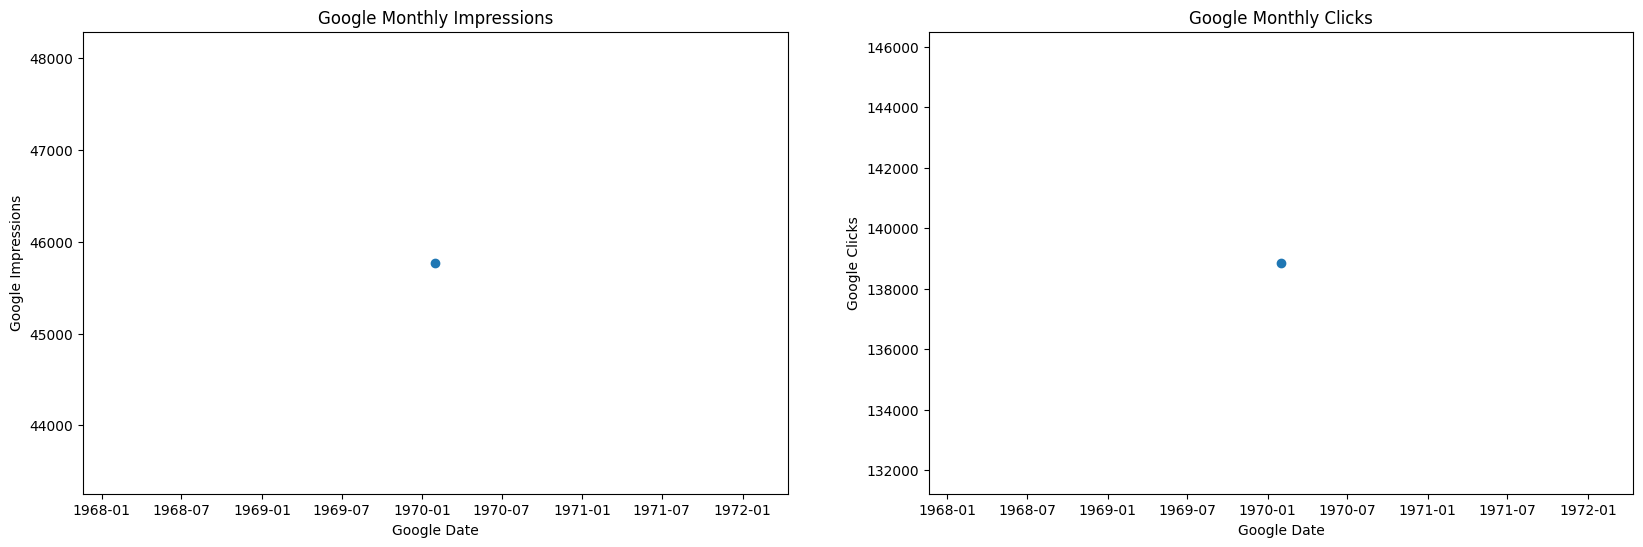

In [54]:

# Set the figure size
plt.figure(figsize=(20, 6))

# Create subplots in a 1x2 grid
plt.subplot(1, 2, 1)


# Plot the 'impressions' column
plt.plot(google_data_monthly.index, google_data_monthly['google_impressions'], marker='o')

# Set plot title and labels
plt.title('Google Monthly Impressions')
plt.xlabel('Google Date')
plt.ylabel('Google Impressions')


plt.subplot(1, 2, 2)
# Plot the 'impressions' column
plt.plot(google_data_monthly.index, google_data_monthly['google_clicks'], marker='o')

# Set plot title and labels
plt.title('Google Monthly Clicks')
plt.xlabel('Google Date')
plt.ylabel('Google Clicks')

# Show the plot
plt.show()

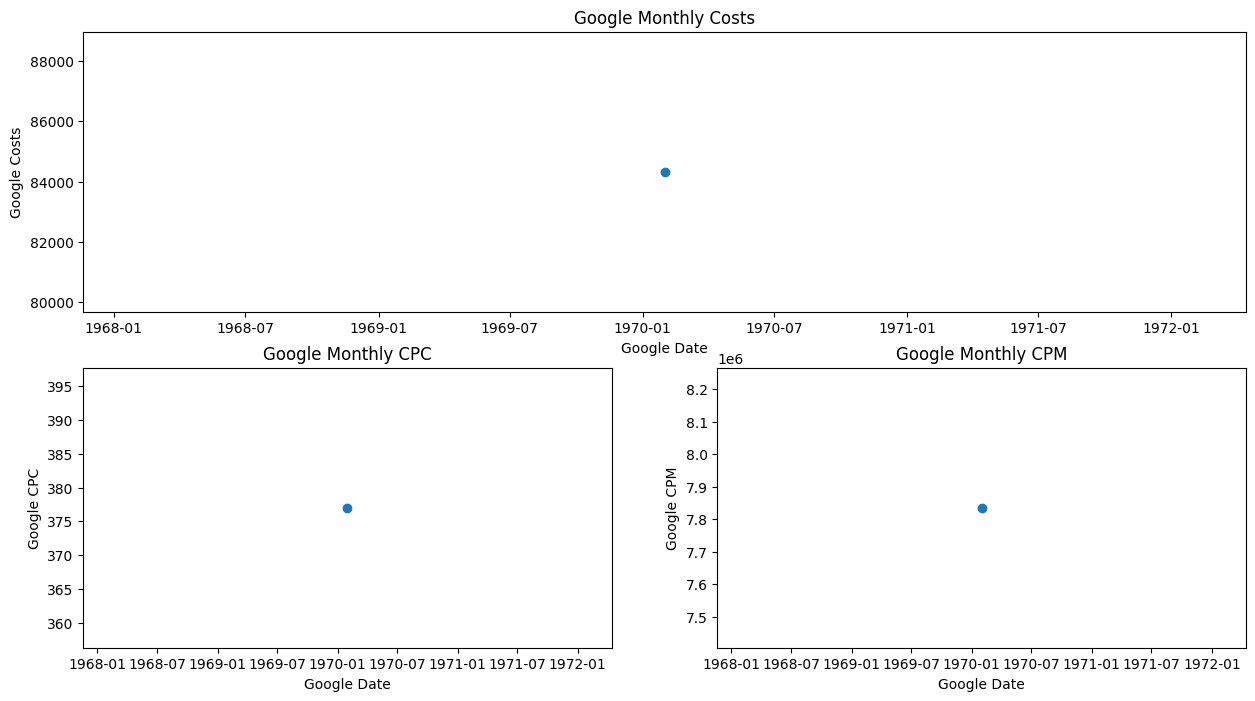

In [55]:

# Set the figure size
plt.figure(figsize=(15, 8))

# Create subplots in a 2x1 grid
plt.subplot(2, 1, 1)

# Plot the 'impressions' column
plt.plot(google_data_monthly.index, google_data_monthly['google_costs'], marker='o')

# Set plot title and labels
plt.title('Google Monthly Costs')
plt.xlabel('Google Date')
plt.ylabel('Google Costs')

plt.subplot(2, 2, 3)

# Plot the 'impressions' column
plt.plot(google_data_monthly.index, google_data_monthly['google_cpc'], marker='o')

# Set plot title and labels
plt.title('Google Monthly CPC')
plt.xlabel('Google Date')
plt.ylabel('Google CPC')

plt.subplot(2, 2,4)

# Plot the 'impressions' column
plt.plot(google_data_monthly.index, google_data_monthly['google_cpm'], marker='o')

# Set plot title and labels
plt.title('Google Monthly CPM')
plt.xlabel('Google Date')
plt.ylabel('Google CPM')

# Show the plot
plt.show()

In [56]:
google_data[google_data.google_impressions <10].shape[0]

355

<Axes: xlabel='google_impressions', ylabel='Count'>

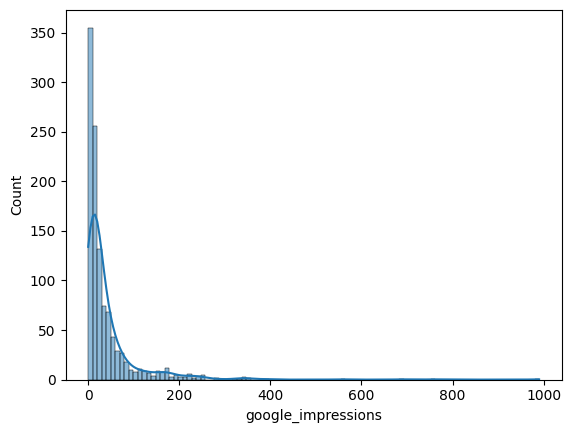

In [57]:
sns.histplot(google_data['google_impressions'], bins=100, kde=True)

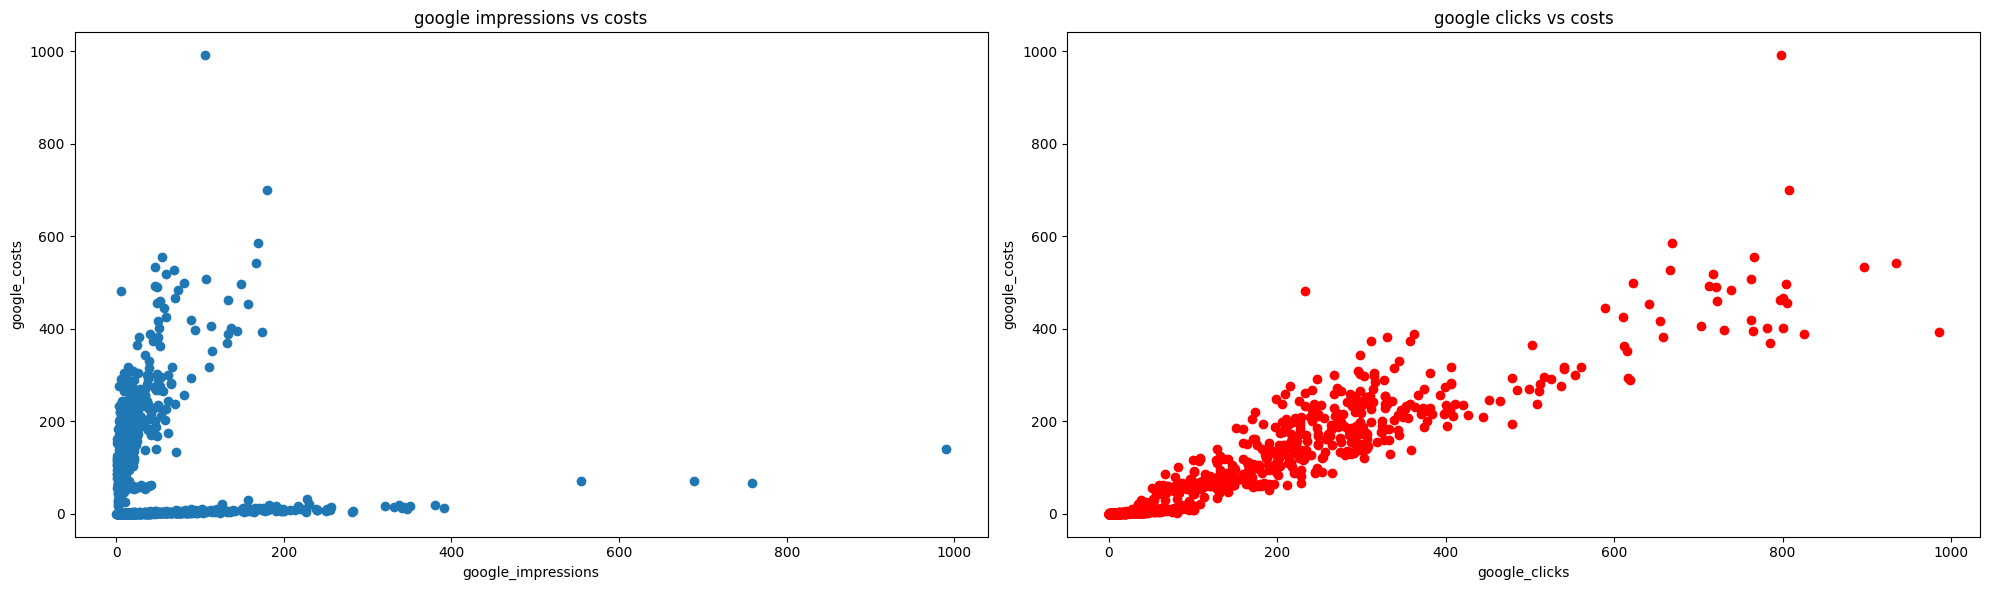

In [58]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)

plt.scatter(google_data['google_impressions'], google_data['google_costs'])
plt.xlabel('google_impressions')
plt.ylabel('google_costs')
plt.title('google impressions vs costs')

plt.subplot(1,2,2)
plt.scatter(google_data['google_clicks'], google_data['google_costs'], c='red')
plt.xlabel('google_clicks')
plt.ylabel('google_costs')
plt.title('google clicks vs costs')

plt.tight_layout()
plt.show()

In [59]:
google_corr=google_data.corr()

/var/folders/2f/v7h8xykj7s91jygz7z529wxr0000gq/T/ipykernel_52724/4283831880.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  google_corr=google_data.corr()


<Axes: >

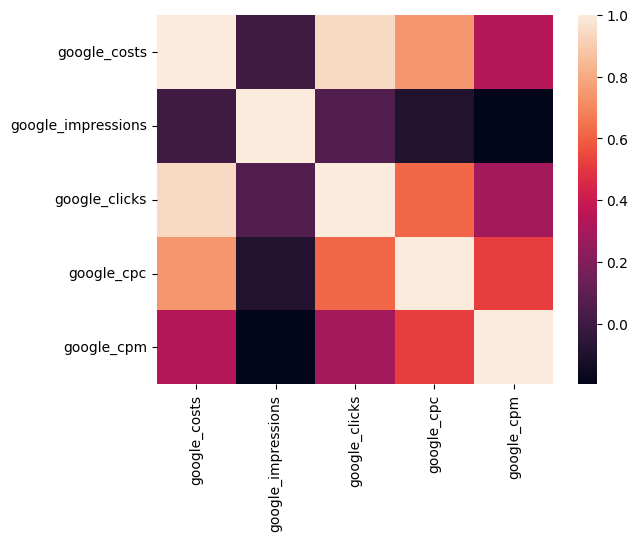

In [60]:
sns.heatmap(google_corr)

/Users/noaruccius/.pyenv/versions/3.10.6/envs/MMM-project-lewagon/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


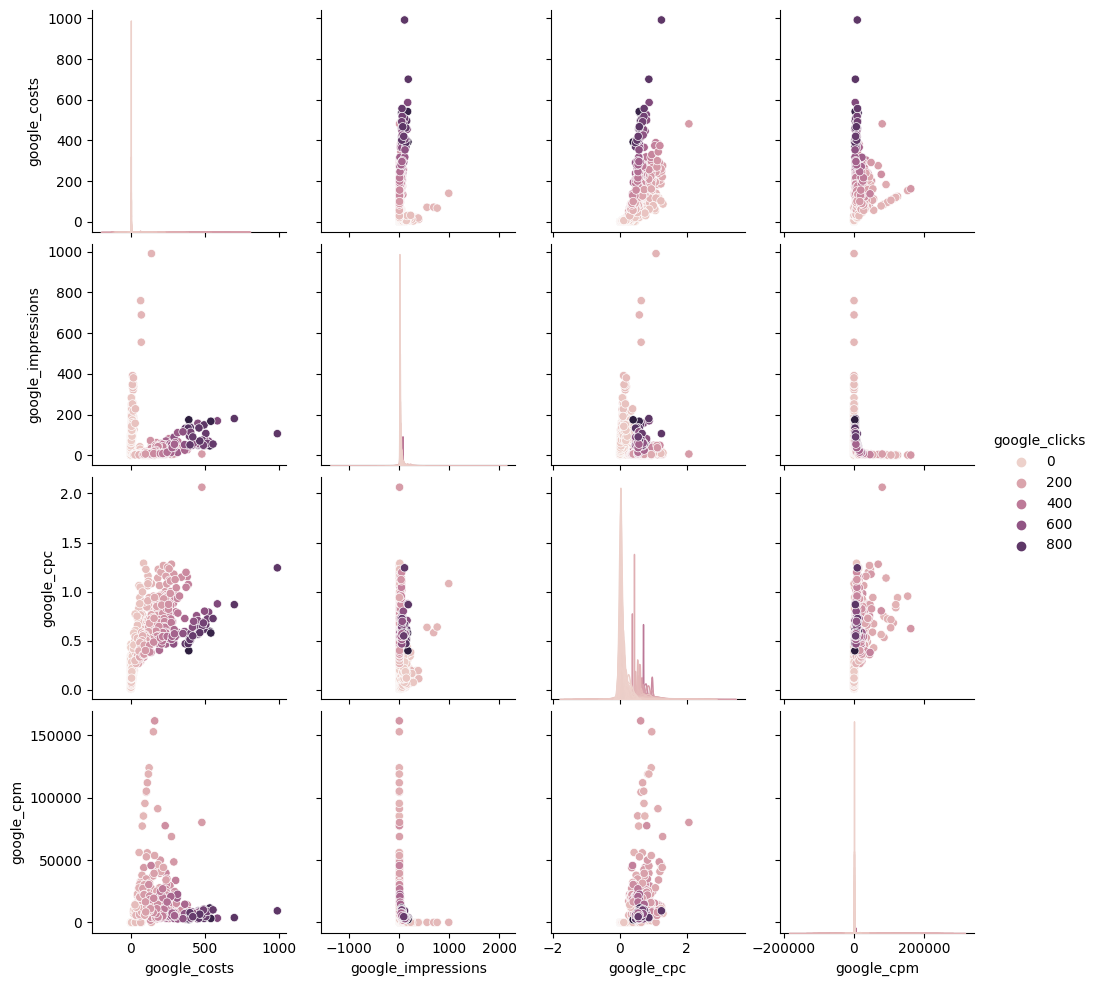

<Figure size 500x500 with 0 Axes>

In [61]:
sns.pairplot(google_data, hue="google_clicks")
plt.figure(figsize=(5,5))
plt.show()

### Summary Google Data

- it seems like in Google the costs is not correlated to impressions but really relates to the amount of clicks. This data can make sense as people who are actually interested in the product might Google it and therefore click on the website. 

- it also seems like that in 09/2023 and 09/2022 there were more costs spend on Google advertisement and therefore there is a clear spike in clicks and impression. 

- I am yet to understand the reasoning behind the spike in Impressions between 2021.1-2021.05

# fb

In [62]:
fb_data.columns

Index(['Day', 'fb_costs', 'fb_impressions', 'fb_clicks', 'fb_cpc', 'fb_cpm'], dtype='object')

In [63]:
fb_data.describe()

,fb_costs,fb_impressions,fb_clicks,fb_cpc,fb_cpm
count,859.000000,859.000000,859.000000,859.000000,859.000000
mean,661.242771,127260.725262,449.200233,inf,5.460919
std,437.560510,90775.943573,295.079128,NaN,2.347723
min,1.230000,123.000000,0.000000,0.093019,0.848693
25%,311.450000,56959.000000,217.500000,1.260316,4.390166
50%,619.770000,116252.000000,427.000000,1.548543,5.180248
75%,944.035000,180968.000000,626.000000,1.976670,6.225085
max,2294.690000,595105.000000,2033.000000,inf,48.084112


In [64]:
# Convert 'Day' column to datetime type
fb_data['Day'] = pd.to_datetime(fb_data['Day'])

# Set 'Day' column as index
fb_data.set_index('Day', inplace=True)

# Check if the index is a DatetimeIndex
print(fb_data.index)

# Resample data by month and aggregate using sum (you can use other aggregation functions)
fb_data_monthly = fb_data.resample('M').sum()
fb_data_monthly.fillna(0)

DatetimeIndex(['2023-08-24', '2023-08-23', '2023-08-22', '2023-08-21',
               '2023-08-20', '2023-08-19', '2023-08-18', '2023-08-17',
               '2023-08-16', '2023-08-15',
               ...
               '2020-08-03', '2020-08-02', '2020-08-01', '2020-07-31',
               '2020-07-30', '2020-07-29', '2020-07-28', '2020-07-27',
               '2020-07-26', '2020-07-25'],
              dtype='datetime64[ns]', name='Day', length=859, freq=None)


,fb_costs,fb_impressions,fb_clicks,fb_cpc,fb_cpm
Day,,,,,
2020-07-31,3498.47,591875,4010,6.501160,42.890981
2020-08-31,9120.94,1835664,13515,14.899794,107.253089
2020-09-30,7198.22,1295357,8373,12.068488,78.898250
2020-10-31,1925.60,289964,1740,4.561245,27.009757
2020-11-30,870.74,151106,810,16.744696,73.539705
2020-12-31,0.00,0,0,0.000000,0.000000
2021-01-31,0.00,0,0,0.000000,0.000000
2021-02-28,0.00,0,0,0.000000,0.000000
2021-03-31,0.00,0,0,0.000000,0.000000


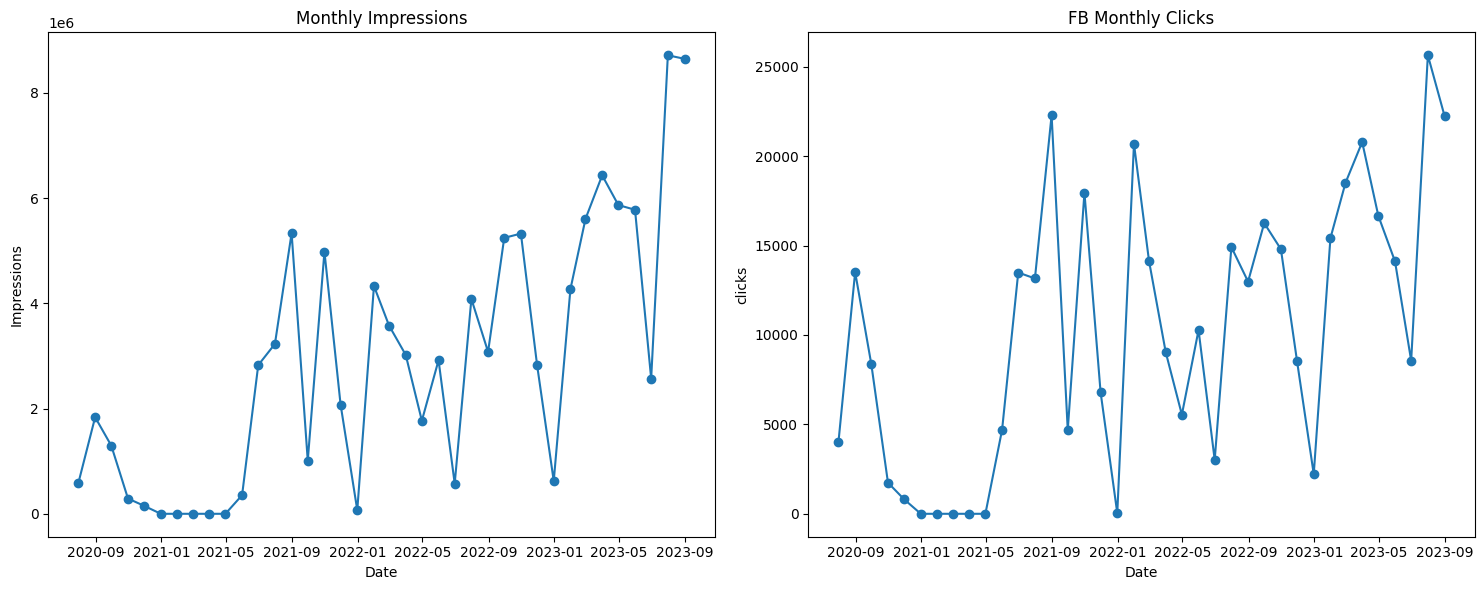

In [65]:
#mothly changes
# Set the figure size
plt.figure(figsize=(15, 6))

# Create subplots in a 1x3 grid
plt.subplot(1, 2, 1)

# Plot the 'impressions' column
plt.plot(fb_data_monthly.index, fb_data_monthly['fb_impressions'], marker='o')

# Set plot title and labels
plt.title('Monthly Impressions')
plt.xlabel('Date')
plt.ylabel('Impressions')

plt.subplot(1, 2, 2)

# Plot the 'impressions' column
plt.plot(fb_data_monthly.index, fb_data_monthly['fb_clicks'], marker='o')

# Set plot title and labels
plt.title('FB Monthly Clicks')
plt.xlabel('Date')
plt.ylabel('clicks')

# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

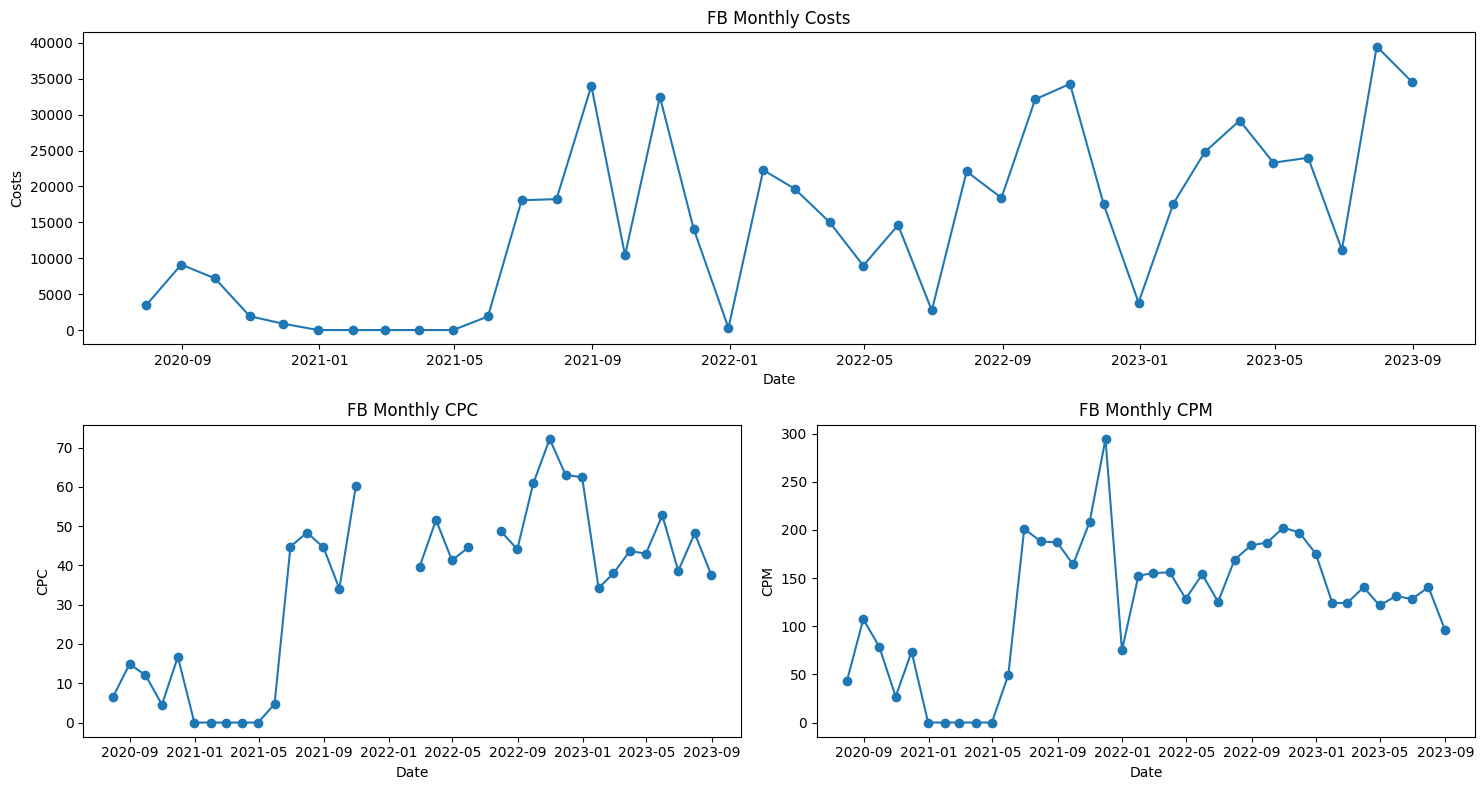

In [66]:

# Set the figure size
plt.figure(figsize=(15, 8))

# Create subplots in a 2x1 grid
plt.subplot(2, 1, 1)

# Plot the 'fb_costs' column
plt.plot(fb_data_monthly.index, fb_data_monthly['fb_costs'], marker='o')
plt.title('FB Monthly Costs')
plt.xlabel('Date')
plt.ylabel('Costs')

plt.subplot(2, 2, 3)

# Plot the 'fb_cpc' column
plt.plot(fb_data_monthly.index, fb_data_monthly['fb_cpc'], marker='o')
plt.title('FB Monthly CPC')
plt.xlabel('Date')
plt.ylabel('CPC')

plt.subplot(2, 2, 4)

# Plot the 'fb_cpm' column
plt.plot(fb_data_monthly.index, fb_data_monthly['fb_cpm'], marker='o')
plt.title('FB Monthly CPM')
plt.xlabel('Date')
plt.ylabel('CPM')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

<Axes: xlabel='fb_impressions', ylabel='Count'>

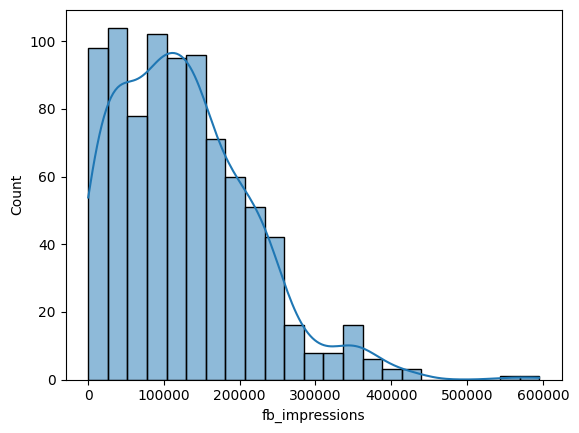

In [67]:
sns.histplot(fb_data['fb_impressions'], kde=True)

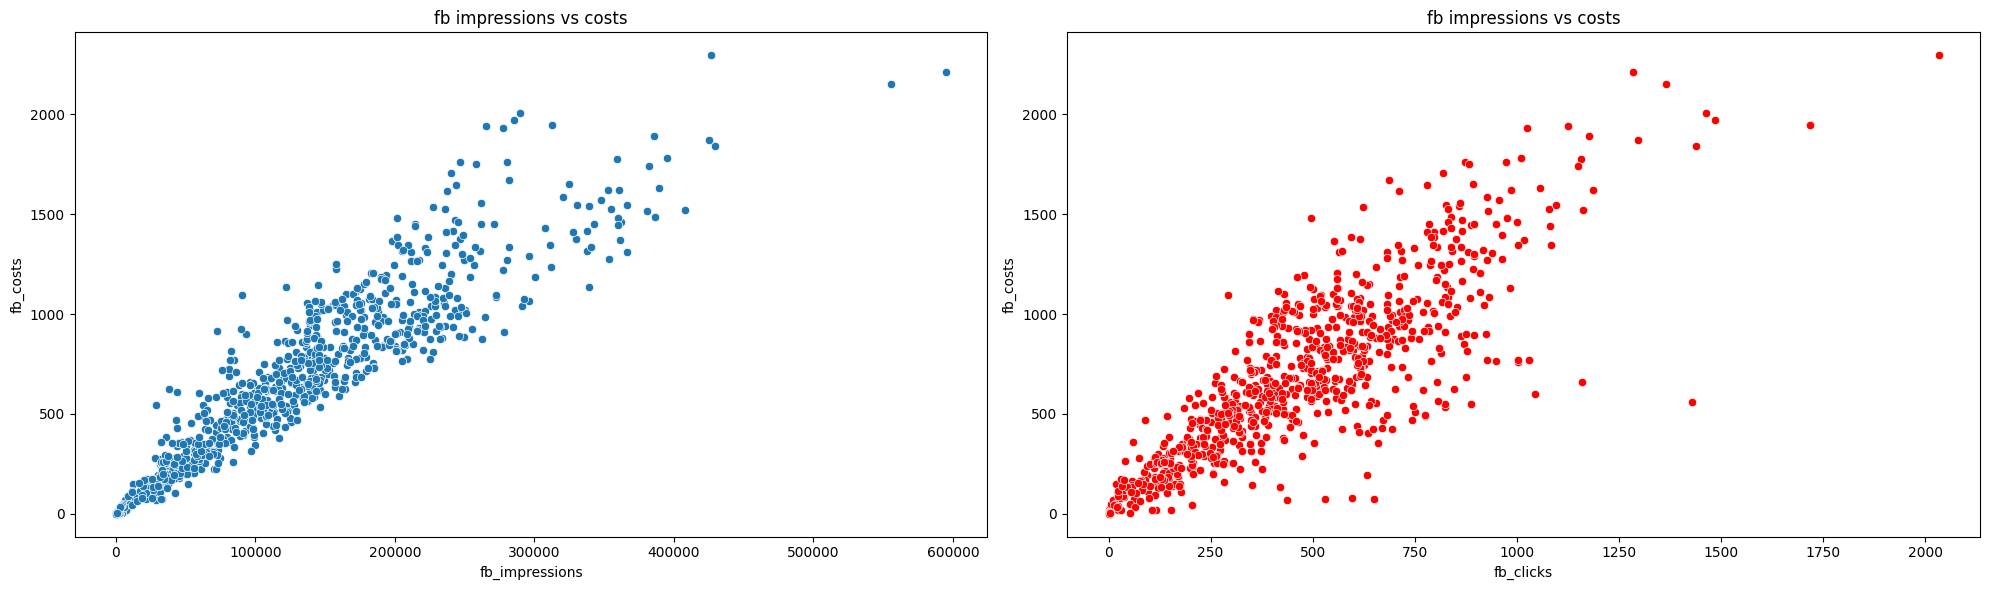

In [68]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.scatterplot(data=fb_data, x="fb_impressions", y="fb_costs")
plt.xlabel('fb_impressions')
plt.ylabel('fb_costs')
plt.title('fb impressions vs costs')

plt.subplot(1,2,2)
sns.scatterplot(data=fb_data, x="fb_clicks", y="fb_costs", color='red')
plt.xlabel('fb_clicks')
plt.ylabel('fb_costs')
plt.title('fb impressions vs costs')

plt.tight_layout()
plt.show()

In [69]:
fb_corr=fb_data.corr()

<Axes: >

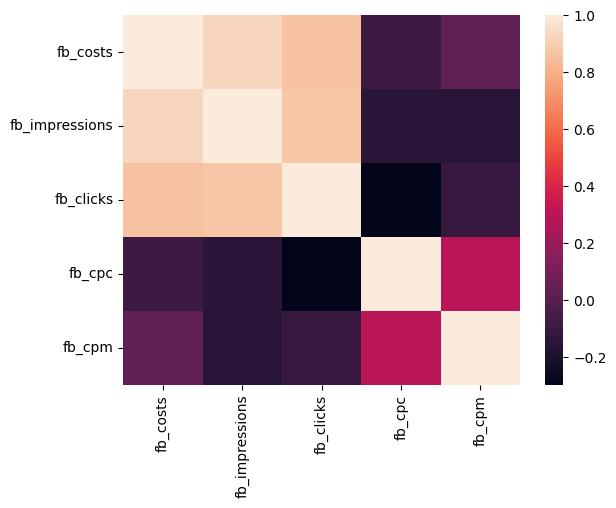

In [70]:
sns.heatmap(fb_corr)

In [71]:
aug_2023_data_fb = fb_data[(fb_data.index.year == 2023) & (fb_data.index.month == 8)]
aug_2023_data_fb

,fb_costs,fb_impressions,fb_clicks,fb_cpc,fb_cpm
Day,,,,,
2023-08-24,1487.41,386594,839,1.772837,3.847473
2023-08-23,1315.81,337607,841,1.564578,3.897461
2023-08-22,1335.84,340325,839,1.592181,3.925189
2023-08-21,2210.01,595105,1284,1.721192,3.713647
2023-08-20,2148.53,555740,1366,1.572862,3.866070
2023-08-19,1377.48,329600,851,1.618660,4.179248
2023-08-18,1417.66,337399,865,1.638913,4.201731
2023-08-17,1458.44,362238,832,1.752933,4.026193
2023-08-16,1478.57,360048,977,1.513378,4.106591


In [72]:
aug_mean_costs_fb=aug_2023_data_fb.fb_costs.mean()

In [73]:
aug_mean_costs_fb+360.66499999999996

1803.3249999999998

In [74]:
aug_2023_data_fb.fb_cpc.mean()

1.568236714017494

In [75]:
aug_2023_data_fb.fb_cpm.mean()

4.013587915653399

In [76]:
aug_2023_data_fb.fb_impressions.mean()

360334.4583333333

In [77]:
(4.013587915653399*360334.4583333333)/1000



1446.2340275601796

In [78]:
aug_2023_data.describe()

,google_costs,google_impressions,google_clicks,google_cpc,google_cpm
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


In [79]:
aug_2023_data_fb.describe()

,fb_costs,fb_impressions,fb_clicks,fb_cpc,fb_cpm
count,24.00000,24.000000,24.000000,24.000000,24.000000
mean,1442.66000,360334.458333,927.041667,1.568237,4.013588
std,312.47379,80028.838600,205.092234,0.176992,0.309473
min,820.98000,204968.000000,559.000000,1.305881,3.577133
25%,1314.50500,335449.250000,837.250000,1.402240,3.834734
50%,1430.92500,354241.500000,884.500000,1.582522,3.985796
75%,1517.13500,370051.750000,1032.750000,1.659483,4.184869
max,2210.01000,595105.000000,1366.000000,1.906476,4.893920


In [80]:
1314.50500/4.013588*1000

327513.6860086287

In [81]:
aug_2023_data_fb.fb_costs.mean()

1442.6599999999999

### Summary Facebook data analysis

- we can clearly see that compared to Google the more we spend on facebook advertisement is more correlated to impressions. in the facebook platform the more money that is invested the more impressions you have. 

- the max of Facebook clicks is 2033 compared to the max of facebook impressions which is 595105 

- The measure costs spending on facebook start in 2021 of 05 therefore there is a slow start to the success of the advertisement on facebook. 

- In addition we can see that on Jan of 2022 and 2023 the costs goes down to almost 0 

- We can also see that for some reason the spend on facebook adds are not constant 


# vizulisation of tt

In [82]:
tt_data.describe()

,tt_costs,tt_impressions,tt_clicks,tt_cpc,tt_cpm
count,601.000000,601.000000,601.000000,576.000000,576.000000
mean,263.777022,126402.222962,505.029950,inf,2.221111
std,153.930623,76706.279910,331.108475,NaN,0.643939
min,0.000000,0.000000,0.000000,0.133133,0.738645
25%,150.000000,59886.000000,284.000000,0.432373,1.861960
50%,268.810000,126648.000000,454.000000,0.551105,2.149530
75%,358.330000,177245.000000,699.000000,0.692062,2.461124
max,840.370000,374925.000000,1731.000000,inf,7.303170


In [83]:

# Convert 'Day' column to datetime type
tt_data['Day'] = pd.to_datetime(tt_data['Day'])

# Set 'Day' column as index
tt_data.set_index('Day', inplace=True)

# Check if the index is a DatetimeIndex
print(tt_data.index)

# Resample data by month and aggregate using sum (you can use other aggregation functions)
tt_data_monthly = tt_data.resample('M').sum()

tt_data_monthly

DatetimeIndex(['2022-07-01', '2022-07-02', '2022-07-03', '2022-07-04',
               '2022-07-05', '2022-07-06', '2022-07-07', '2022-07-08',
               '2022-07-09', '2022-07-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='Day', length=601, freq=None)


,tt_costs,tt_impressions,tt_clicks,tt_cpc,tt_cpm
Day,,,,,
2022-01-31,4993.51,4097730,19410,4.788554,22.210892
2022-02-28,13403.42,6608615,30922,12.750130,59.130150
2022-03-31,10763.74,5177281,25759,13.776596,65.826463
2022-04-30,4802.94,2281976,13304,NaN,58.631468
2022-05-31,6220.35,2746253,12863,15.028001,75.127969
2022-06-30,2861.59,1131890,5705,NaN,75.649988
2022-07-31,9786.79,3819565,17621,17.761520,79.950319
2022-08-31,7819.96,3267642,14367,16.029609,68.045403
2022-09-30,13125.21,4365544,14250,30.885251,100.985072


In [84]:
tt_data_monthly.index

DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
               '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31'],
              dtype='datetime64[ns]', name='Day', freq='M')

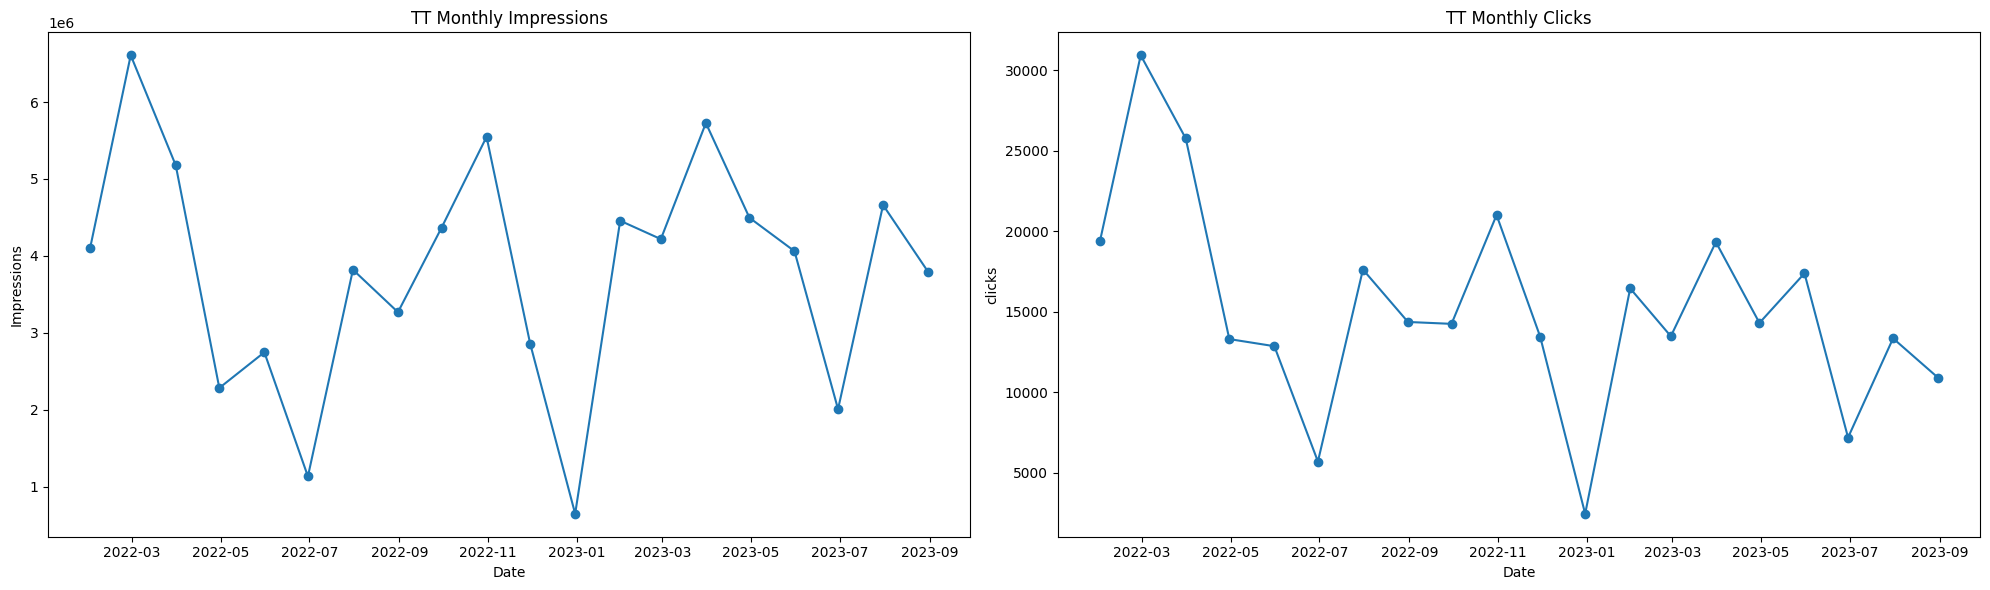

In [85]:

#mothly changes
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)

# Plot the 'impressions' column
plt.plot(tt_data_monthly.index, tt_data_monthly['tt_impressions'], marker='o')

# Set plot title and labels
plt.title('TT Monthly Impressions')
plt.xlabel('Date')
plt.ylabel('Impressions')

plt.subplot(1, 2, 2)
# Plot the 'impressions' column
plt.plot(tt_data_monthly.index, tt_data_monthly['tt_clicks'], marker='o')

# Set plot title and labels
plt.title('TT Monthly Clicks')
plt.xlabel('Date')
plt.ylabel('clicks')

# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

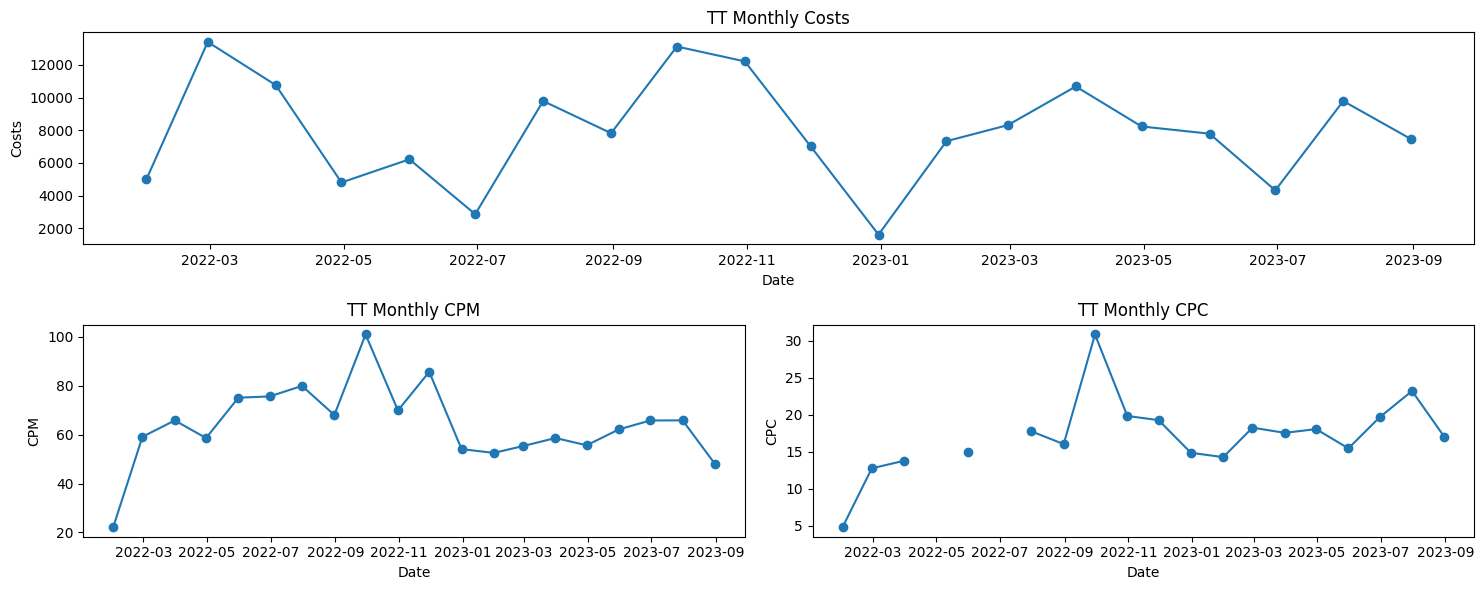

In [86]:
#mothly changes
plt.figure(figsize=(15, 6))

plt.subplot(2,1,1)
# Plot the 'impressions' column
plt.plot(tt_data_monthly.index, tt_data_monthly['tt_costs'], marker='o')

# Set plot title and labels
plt.title('TT Monthly Costs')
plt.xlabel('Date')
plt.ylabel('Costs')

plt.subplot(2,2,3)
# Plot the 'impressions' column
plt.plot(tt_data_monthly.index, tt_data_monthly['tt_cpm'], marker='o')

# Set plot title and labels
plt.title('TT Monthly CPM')
plt.xlabel('Date')
plt.ylabel('CPM')

plt.subplot(2,2,4)
# Plot the 'impressions' column
plt.plot(tt_data_monthly.index, tt_data_monthly['tt_cpc'], marker='o')

# Set plot title and labels
plt.title('TT Monthly CPC')
plt.xlabel('Date')
plt.ylabel('CPC')

# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

<Axes: xlabel='tt_impressions', ylabel='Count'>

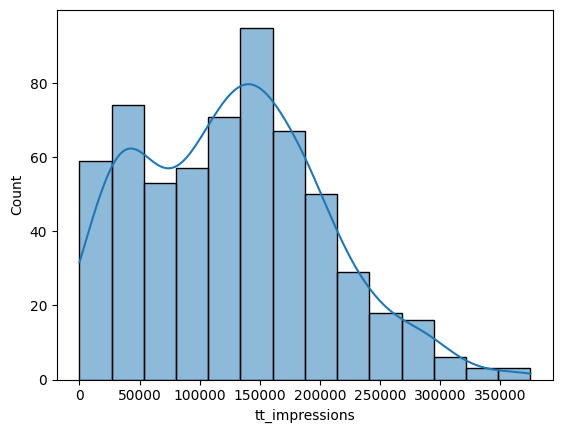

In [87]:
sns.histplot(tt_data['tt_impressions'], kde=True)

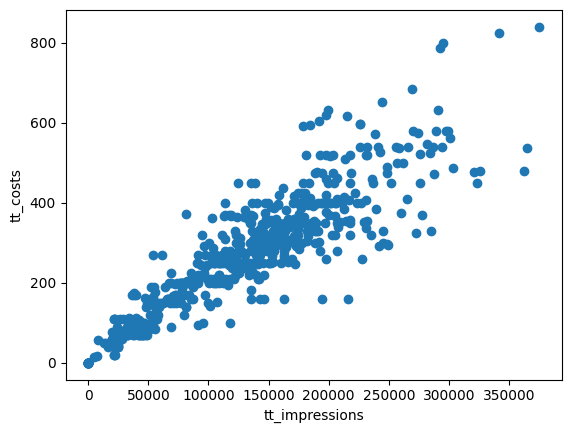

In [88]:
plt.scatter(tt_data['tt_impressions'], tt_data['tt_costs'])
plt.xlabel('tt_impressions')
plt.ylabel('tt_costs');

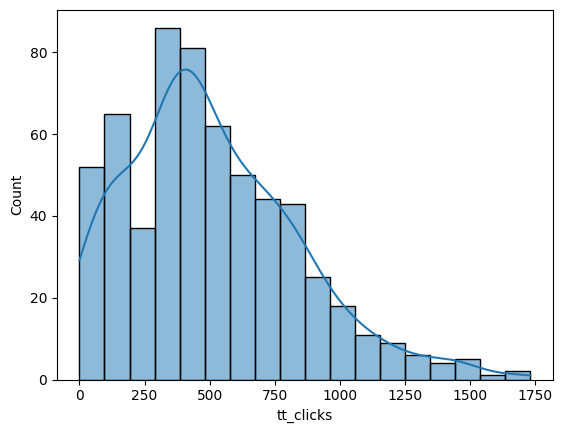

In [89]:
sns.histplot(tt_data['tt_clicks'], kde=True);

In [90]:
tt_corr=tt_data.corr()

<Axes: >

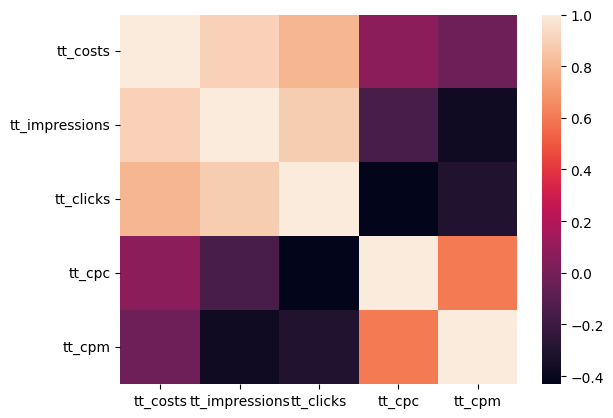

In [91]:

sns.heatmap(tt_corr)

## Summary Tiktok 

- it seems like we don't have many data point on tiktok only 152 data points 
- impressions and click looks like they are highly correlated with costs. 
- impressions are slightly more correlated with costs than clicks.  In addition the max impressions clearly were much higher than the amount of clicks  

# compare of the three df 

In [92]:


# Calculate mean values for costs, impressions, and clicks
google_mean_costs = np.mean(google_data['google_costs'])
fb_mean_costs = np.mean(fb_data['fb_costs'])
tt_mean_costs = np.mean(tt_data['tt_costs'])

google_mean_impressions = np.mean(google_data['google_impressions'])
fb_mean_impressions = np.mean(fb_data['fb_impressions'])
tt_mean_impressions = np.mean(tt_data['tt_impressions'])

google_mean_clicks = np.mean(google_data['google_clicks'])
fb_mean_clicks = np.mean(fb_data['fb_clicks'])
tt_mean_clicks = np.mean(tt_data['tt_clicks'])

# Create a DataFrame for the summarized data
data = {
    'Platform': ['Google', 'Facebook', 'Tiktok'],
    'Mean_Costs': [google_mean_costs, fb_mean_costs, tt_mean_costs],
    'Mean_Impressions': [google_mean_impressions, fb_mean_impressions, tt_mean_impressions],
    'Mean_Clicks': [google_mean_clicks, fb_mean_clicks, tt_mean_clicks]
}
summary_df = pd.DataFrame(data)

summary_df

,Platform,Mean_Costs,Mean_Impressions,Mean_Clicks
0,Google,74.890409,40.650089,123.318828
1,Facebook,661.242771,127260.725262,449.200233
2,Tiktok,263.777022,126402.222962,505.029950


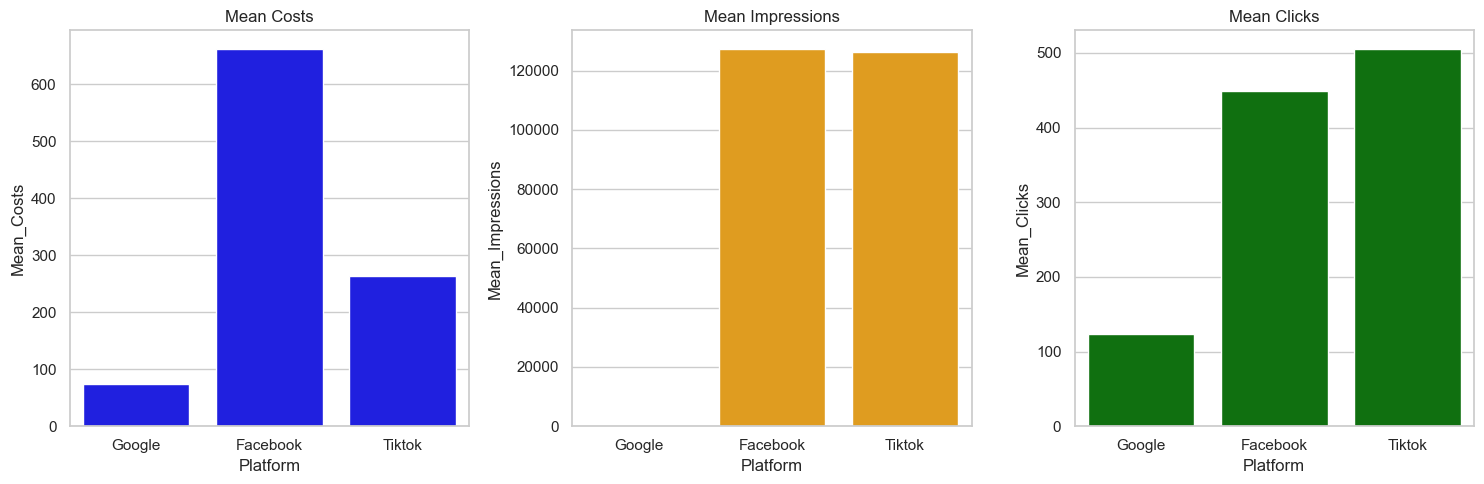

In [93]:

# Create the Seaborn visualization
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Mean Costs
sns.barplot(x="Platform", y="Mean_Costs", data=summary_df, color='blue', ax=axes[0])
axes[0].set_title("Mean Costs")

# Mean Impressions
sns.barplot(x="Platform", y="Mean_Impressions", data=summary_df, color='orange', ax=axes[1])
axes[1].set_title("Mean Impressions")

# Mean Clicks
sns.barplot(x="Platform", y="Mean_Clicks", data=summary_df, color='green', ax=axes[2])
axes[2].set_title("Mean Clicks")

plt.tight_layout()
plt.show()

In [94]:
facebook_impressions_avg=np.mean(df['fb_impressions']/df['Total_social_impressions'])

In [95]:
tiktok_impressions_avg=np.mean(df['tt_impressions']/df['Total_social_impressions'])
tiktok_impressions_avg

0.36857470656293734

In [96]:
google_spend_avg=np.mean(df['google_costs']/df['Total_Spend'])
google_spend_avg

0.12544532456323176

In [97]:
facebook_spend_avg=np.mean(df['fb_costs']/df['Total_Spend'])
facebook_spend_avg

0.6766951868483377

In [98]:
tiktok_spend_avg=np.mean(df['tt_costs']/df['Total_Spend'])
tiktok_spend_avg

0.19785948858843044

In [99]:
facebook_clicks_avg=np.mean(df['fb_clicks']/df['Total_clicks'])

In [100]:
tiktok_clicks_avg=np.mean(df['tt_clicks']/df['Total_clicks'])
tiktok_clicks_avg

0.3191383946062048

In [101]:
facebook_clicks_avg=np.mean(df['fb_clicks']/df['Total_clicks'])
facebook_clicks_avg

0.44991805123553935

In [102]:
google_clicks_avg=np.mean(df['google_clicks']/df['Total_clicks'])
google_clicks_avg

0.2309435541582559

In [103]:
google_impressions_avg=0

In [104]:
# Create a DataFrame with row names
data = {
    'Company': ['Google', 'TikTok', 'Facebook'],
    '% Clicks': [google_clicks_avg, tiktok_clicks_avg, facebook_clicks_avg],
    '% Spend': [google_spend_avg, tiktok_spend_avg, facebook_spend_avg],
    '% Impressions': [google_impressions_avg, tiktok_impressions_avg, facebook_impressions_avg]
}

df_avg = pd.DataFrame(data)


In [105]:
df_avg.set_index('Company', inplace=True)

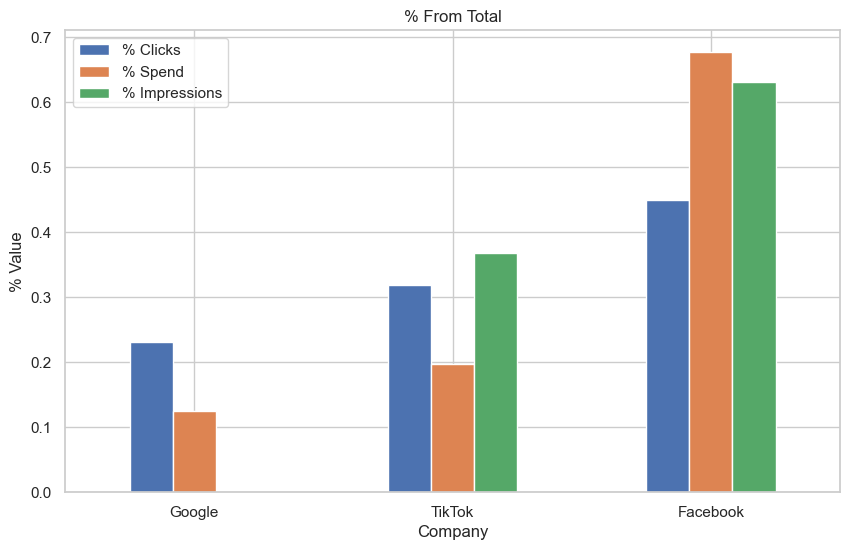

In [106]:
# Create a bar plot
df_avg.plot(kind='bar', rot=0, figsize=(10, 6))
plt.title('% From Total')
plt.ylabel('% Value')
plt.show()


In [107]:
df.replace([np.inf, -np.inf], 0, inplace=True)

In [109]:
tiktok_cpc_avg=df.tt_cpc.mean()

In [110]:
google_cpc_avg=df.google_cpc.mean()

In [111]:
facebook_cpc_avg=df.fb_cpc.mean()

In [112]:
facebook_cpm_avg=df.fb_cpm.mean()

In [113]:
tiktok_cpm_avg=df.tt_cpm.mean()

In [114]:
google_cpm_avg=0

In [118]:
data_01 = {
    'Company': ['Google','TikTok', 'Facebook'],
    'Avg CPC': [google_cpc_avg, tiktok_cpc_avg, facebook_cpc_avg],
    'Avg CPM': [google_cpm_avg, tiktok_cpm_avg, facebook_cpm_avg]
}

df_avg_cpc_cpm = pd.DataFrame(data_01)




In [120]:
df_avg_cpc_cpm
df_avg_cpc_cpm.set_index('Company', inplace=True)

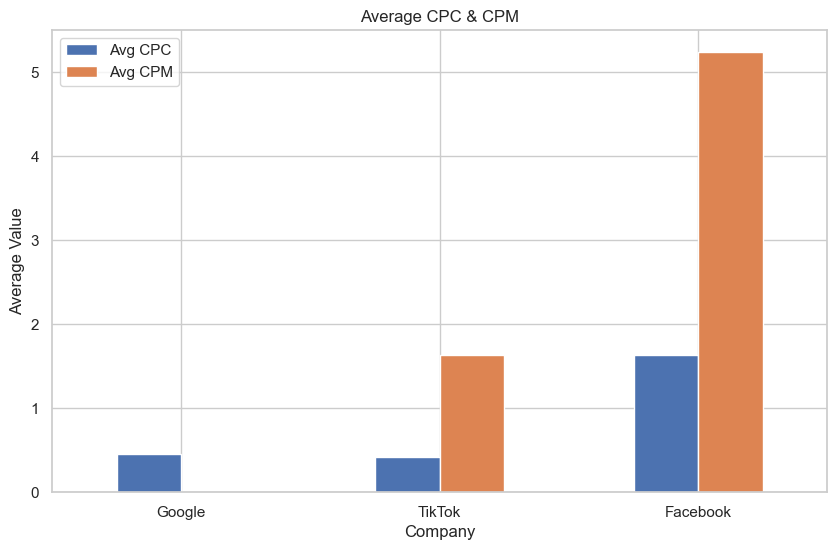

In [121]:
# Create a bar plot for both Avg CPC and Avg CPM
df_avg_cpc_cpm.plot(kind='bar', rot=0, figsize=(10, 6))
plt.title('Average CPC & CPM')
plt.xlabel('Company')
plt.ylabel('Average Value')
plt.show()

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# FB dist
sns.histplot(fb_data['fb_costs'], color='blue', ax=axes[0, 0], kde=True)
axes[0, 0].set_title("Facebook Distribution Costs")

# TT dist
sns.histplot(tt_data['tt_costs'], color='orange', ax=axes[0, 1], kde=True)
axes[0, 1].set_title("Tiktok Distribution Costs")

# Google dist
sns.histplot(google_data['google_costs'], color='green', ax=axes[1, 0], kde=True)
axes[1, 0].set_title("Google Distribution Costs")

sns.histplot(df['Total_Spend'], color='red', ax=axes[1, 1], kde=True)
axes[1, 1].set_title("Total Spend Distribution")

plt.tight_layout()
plt.show()

In [ ]:
# Combine all cost data into a single DataFrame
combined_costs = pd.concat([fb_data['fb_costs'], tt_data['tt_costs'], google_data['google_costs'], df['Total_Spend']],
                           axis=1, keys=['Facebook', 'TikTok', 'Google', 'Total_Spend'])

# Create the Seaborn visualization
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.violinplot(data=combined_costs, palette="Set1")
plt.xlabel("Platform")
plt.ylabel("Costs")
plt.title("Distribution of Costs for Different Platforms")
plt.show()

## Summary of Means

- Facebook's mean cost was the highest, with an average of around 600 euros. Compared to Google, that is the lowest, with an average of less than 100 euros.
- It is interesting to see that the average cost of tiktok is much lower than that of Facebook, yet tiktok presents better results in both impressions and clicks. One needs to take into account that TikTok did have much fewer data points, and therefore this conclusion might change with more data added.
- Google seems to produce the lowest mean of impressions and clicks, but it probably also contributes to the fact that there was not so much money invested in this platform.
- The last two costs present the distribution of the costs for each platform. One can see that the measurity of the cost spent was invested in Facebook and that the measurity of the costs on Google was close to 0.
- We can also see the total distribution of costs that looks very similar to Facebook costs, which makes sense as Facebook was the measure of marketing costs.

# vizualisations of df

In [ ]:
# Assuming df is your DataFrame

# List of columns for which you want to create boxplots
columns_to_plot = ["fb_costs", "google_costs", "tt_costs", "Total_Spend"]

# Create a figure with a grid layout of 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each column and plot boxplots in the subplots
for i, column in enumerate(columns_to_plot):
        ax = axes[i]  # Get the appropriate subplot
        ax.boxplot(df[column])  # Create a boxplot
        ax.set_title(f'Boxplot of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Value')

# Hide the unused subplot
axes[3].axis('off')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


## Boxplot Explanation

- This boxplot presents the normal distribution and outliers of costs per platform.

- It is important to take the tt costs with a grain of salt, as most of them are 0 because we don't have many data points. One can see that, most likely, the mean of the costs is around 400 Euros.

- Google values also seem to have some outliers, as usualy the costs of it go between 0-200 Euros.

- It seems like the most money spent on marketing is invested in Facebook.

- The total spend on Boxplot seems to not have many outliers more information in the next visual. 

In [ ]:
df

## Data vis over time 

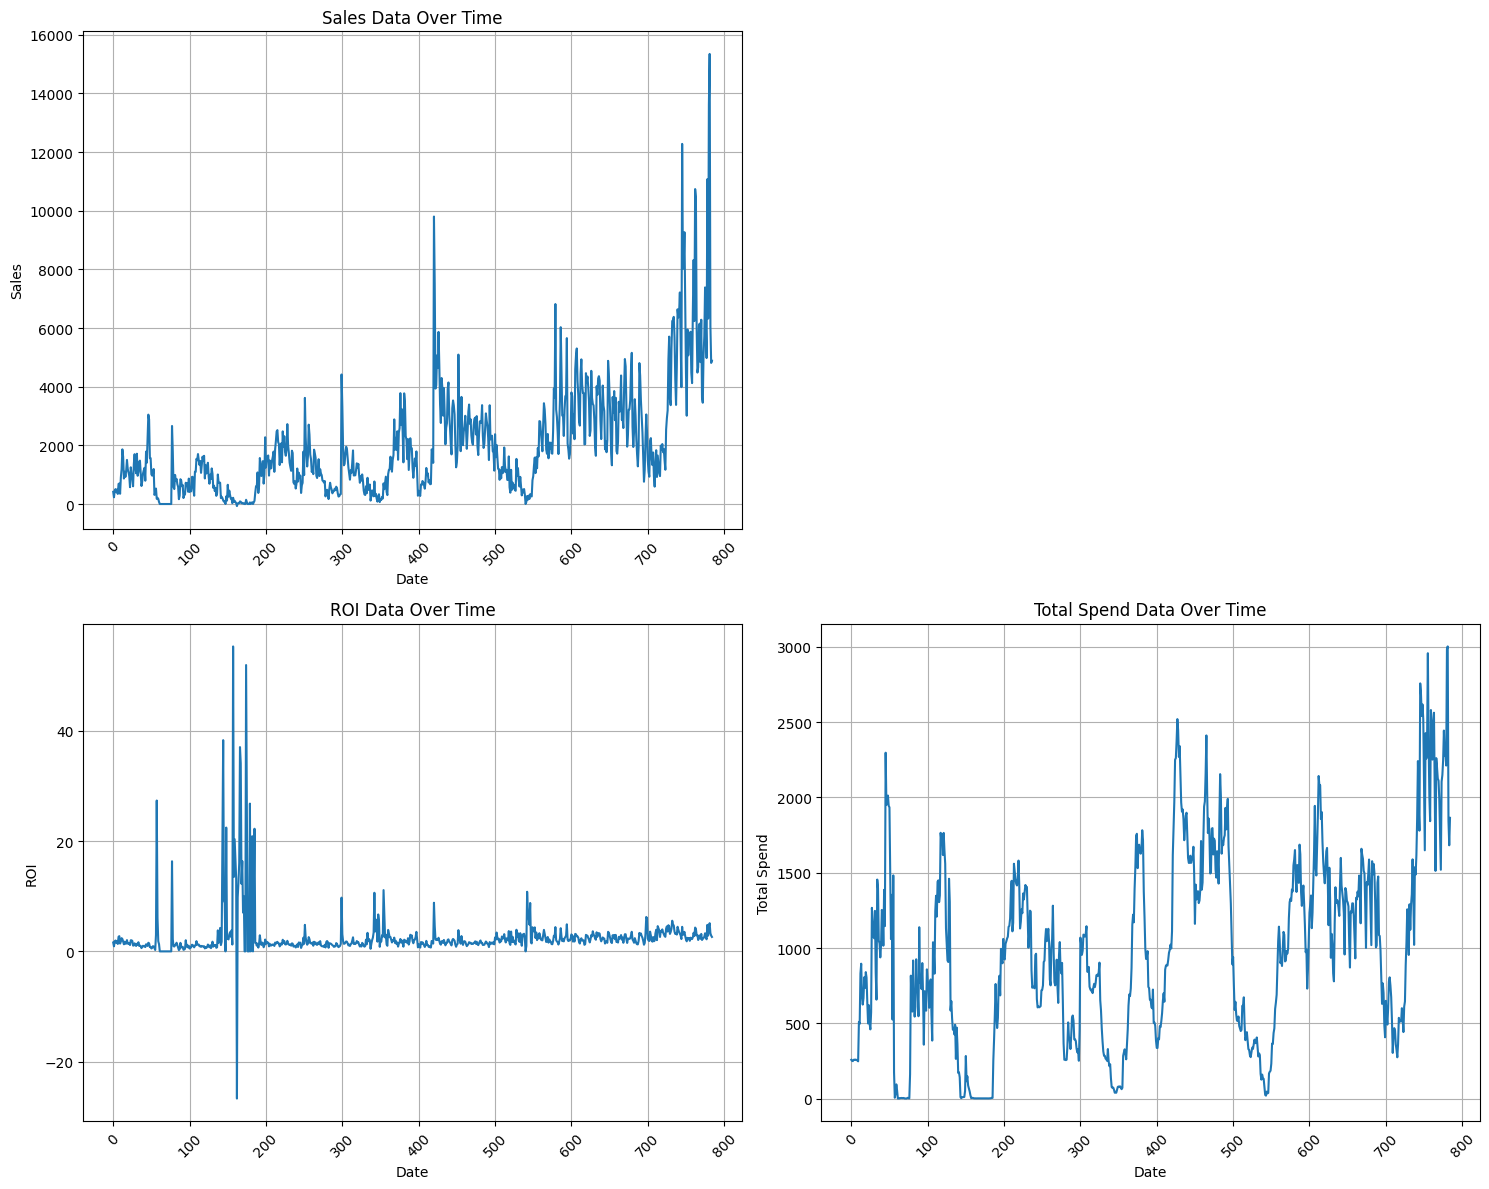

In [28]:



plt.figure(figsize=(15, 12))  # Create a single figure for all subplots

# Subplot 1: Sales Data Over Time (spanning whole row)
plt.subplot(2, 2, 1)  # 3 rows, 1 column, first subplot
plt.plot(df.index, df['total_sales'], linestyle='-')
plt.title('Sales Data Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)

# Subplot 2: ROI Data Over Time
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, second subplot
plt.plot(df.index, df['ROI'], linestyle='-')
plt.title('ROI Data Over Time')
plt.xlabel('Date')
plt.ylabel('ROI')
plt.grid(True)
plt.xticks(rotation=45)

# Subplot 3: Total Spend Data Over Time
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, fourth subplot
plt.plot(df.index, df['Total_Spend'], linestyle='-')
plt.title('Total Spend Data Over Time')
plt.xlabel('Date')
plt.ylabel('Total Spend')
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [30]:
df_sortby_cpm=df.sort_values(by='Total_Social_CPM', ascending=False)

In [35]:
df['Total_Social_CPM'].replace([np.inf, -np.inf], 0, inplace=True)

In [36]:
df.sort_values(by='Total_Social_CPM', ascending=False)

,Day,orders,total_sales,fb_costs,fb_impressions,fb_clicks,google_costs,google_impressions,google_clicks,tt_costs,...,fb_cpc,tt_cpc,google_cpc,fb_cpm,tt_cpm,google_cpm,Total_clicks,Total_CPC,Total_social_impressions,Total_Social_CPM
148,2021-11-26,8,259.98,10.29,214.0,0.0,1.28,32.0,19.0,NaN,...,inf,NaN,0.067368,48.084112,NaN,40.000000,19.0,0.608947,214.0,54.065421
144,2021-11-22,5,123.45,2.42,123.0,0.0,0.80,40.0,16.0,NaN,...,inf,NaN,0.050000,19.674797,NaN,20.000000,16.0,0.201250,123.0,26.178862
83,2021-09-22,21,854.76,543.45,29053.0,213.0,1.26,15.0,12.0,NaN,...,2.551408,NaN,0.105000,18.705469,NaN,84.000000,225.0,2.420933,29053.0,18.748838
82,2021-09-21,22,805.02,624.70,38315.0,276.0,0.21,15.0,6.0,NaN,...,2.263406,NaN,0.035000,16.304319,NaN,14.000000,282.0,2.215993,38315.0,16.309800
84,2021-09-23,20,672.81,609.44,43624.0,278.0,0.64,10.0,8.0,NaN,...,2.192230,NaN,0.080000,13.970292,NaN,64.000000,286.0,2.133147,43624.0,13.984962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2021-08-31,0,0.00,NaN,NaN,NaN,1.02,40.0,24.0,NaN,...,NaN,NaN,0.042500,NaN,NaN,25.500000,24.0,0.042500,0.0,0.000000
542,2022-12-25,7,271.18,NaN,NaN,NaN,25.07,3.0,51.0,0.0,...,NaN,NaN,0.491569,NaN,NaN,8356.666667,51.0,0.491569,0.0,0.000000
70,2021-09-09,0,0.00,NaN,NaN,NaN,1.20,14.0,9.0,NaN,...,NaN,NaN,0.133333,NaN,NaN,85.714286,9.0,0.133333,0.0,0.000000
71,2021-09-10,0,0.00,NaN,NaN,NaN,1.51,27.0,12.0,NaN,...,NaN,NaN,0.125833,NaN,NaN,55.925926,12.0,0.125833,0.0,0.000000


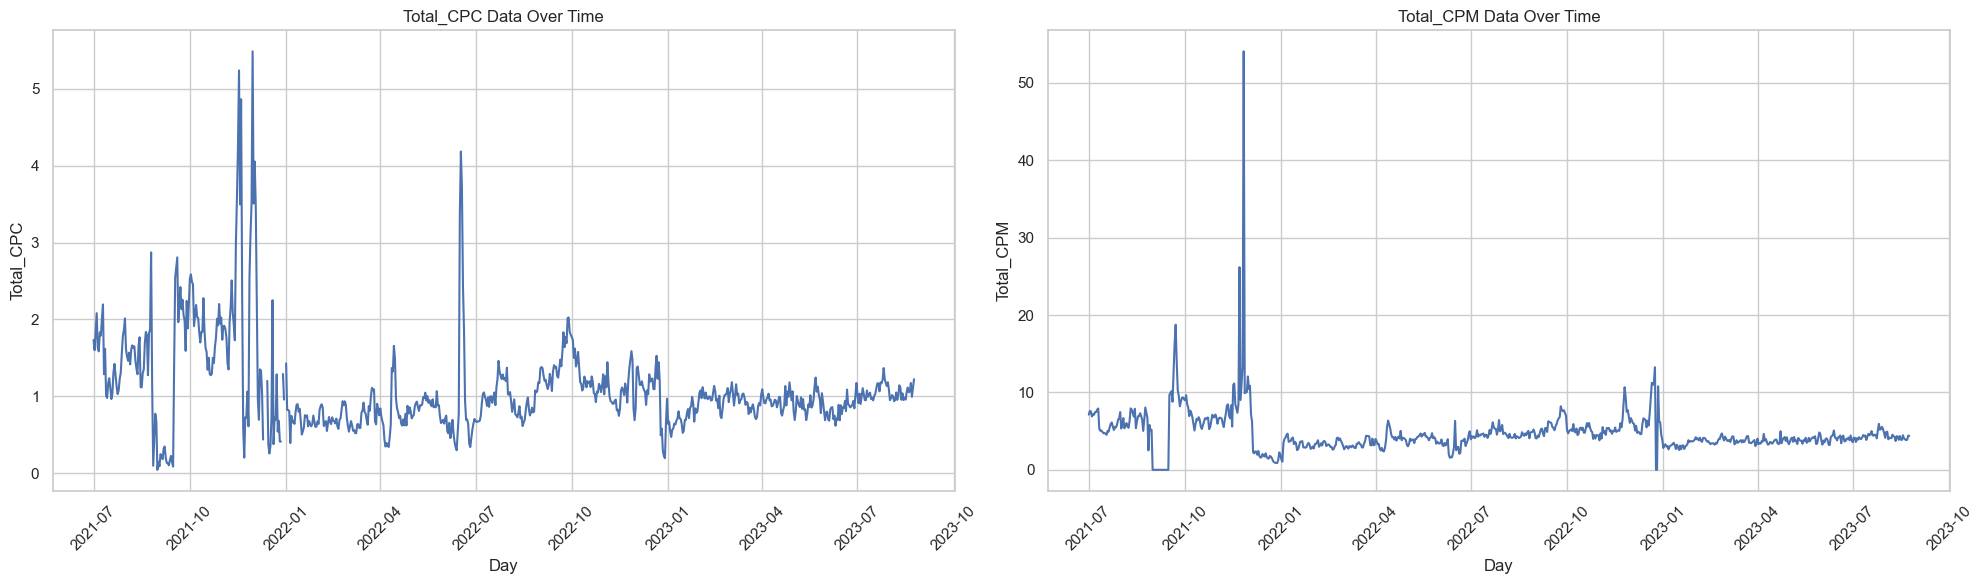

In [41]:
plt.figure(figsize=(20, 6))  # Adjust the figure size as needed
plt.subplot(1,2,1)

# Plotting

plt.plot(df['Day'], df['Total_CPC'], linestyle='-')
plt.title('Total_CPC Data Over Time')
plt.xlabel('Day')
plt.ylabel('Total_CPC')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.subplot(1,2,2)
plt.plot(df[['Day']], df['Total_Social_CPM'], linestyle='-')
plt.title('Total_CPM Data Over Time')
plt.xlabel('Day')
plt.ylabel('Total_CPM')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability


plt.tight_layout()
plt.show()

## SALES and ROI

- In the above plot of sales data over time, we can see the distribution of sales spread over the years. The spikes in sales can be explained very well by the spending on marketing. The more money invested in marketing, the higher the sales.

- The return on investment plot seems to be quite consistent, except for the 2021 December, when there was a spike in the decrease in ROI. It is hard to explain why, even though there was a spike in spends on marketing, it did not seem to be similar to other years in the season before January.

- The spike in July 2022 in ROI is consistent with the trend we have seen in the sales date and the spand data.

# total sales compared to each platform 

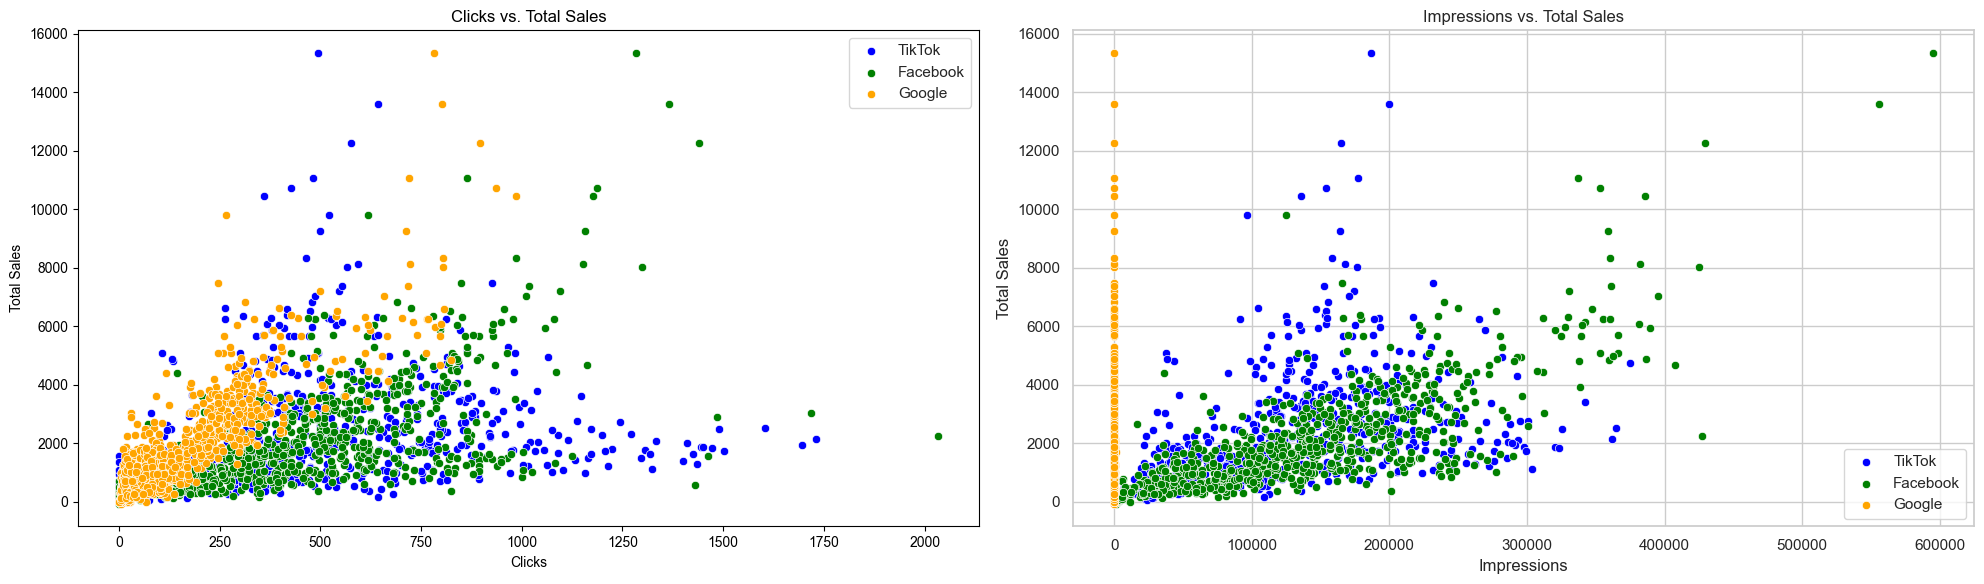

In [37]:
# Create the scatter plot using Seaborn
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
# Set the style for the plot (optional)
sns.set(style="whitegrid")
sns.scatterplot(x='tt_clicks', y='total_sales', data=df, label='TikTok', color='blue')
sns.scatterplot(x='fb_clicks', y='total_sales', data=df, label='Facebook', color='green')
sns.scatterplot(x='google_clicks', y='total_sales', data=df, label='Google', color='orange')
# Set plot title and labels
plt.title('Clicks vs. Total Sales')
plt.xlabel('Clicks')
plt.ylabel('Total Sales')
# Show legend
plt.legend()


plt.subplot(1,2,2)
# Set the style for the plot (optional)
sns.set(style="whitegrid")
sns.scatterplot(x='tt_impressions', y='total_sales', data=df, label='TikTok', color='blue')
sns.scatterplot(x='fb_impressions', y='total_sales', data=df, label='Facebook', color='green')
sns.scatterplot(x='google_impressions', y='total_sales', data=df, label='Google', color='orange')
# Set plot title and labels
plt.title('Impressions vs. Total Sales')
plt.xlabel('Impressions')
plt.ylabel('Total Sales')

# Show legend
plt.legend()

plt.tight_layout()
# Show the plot
plt.show()

## Clicks vs. Total Sales explanation 

The TikTok sales influence is not really that good. One needs to remember that a biig percentage of the data points were converted to 0, as the data in TikTok only exists for 5 months.

This section shows that the best platform to achieve clicks is actually Google. also keeping in mind that Google was one of our lost expanses of marketing.

## Impressions vs. Total Sales explanation 

- One can see here that the worst platform for impressions is Google.
- The stronger platforms for impressions and raising awareness for our product and company are Facebook and Tiktok.
- If the C-level wants to raise people's awareness of the company, I would suggest they start using TikTok again.

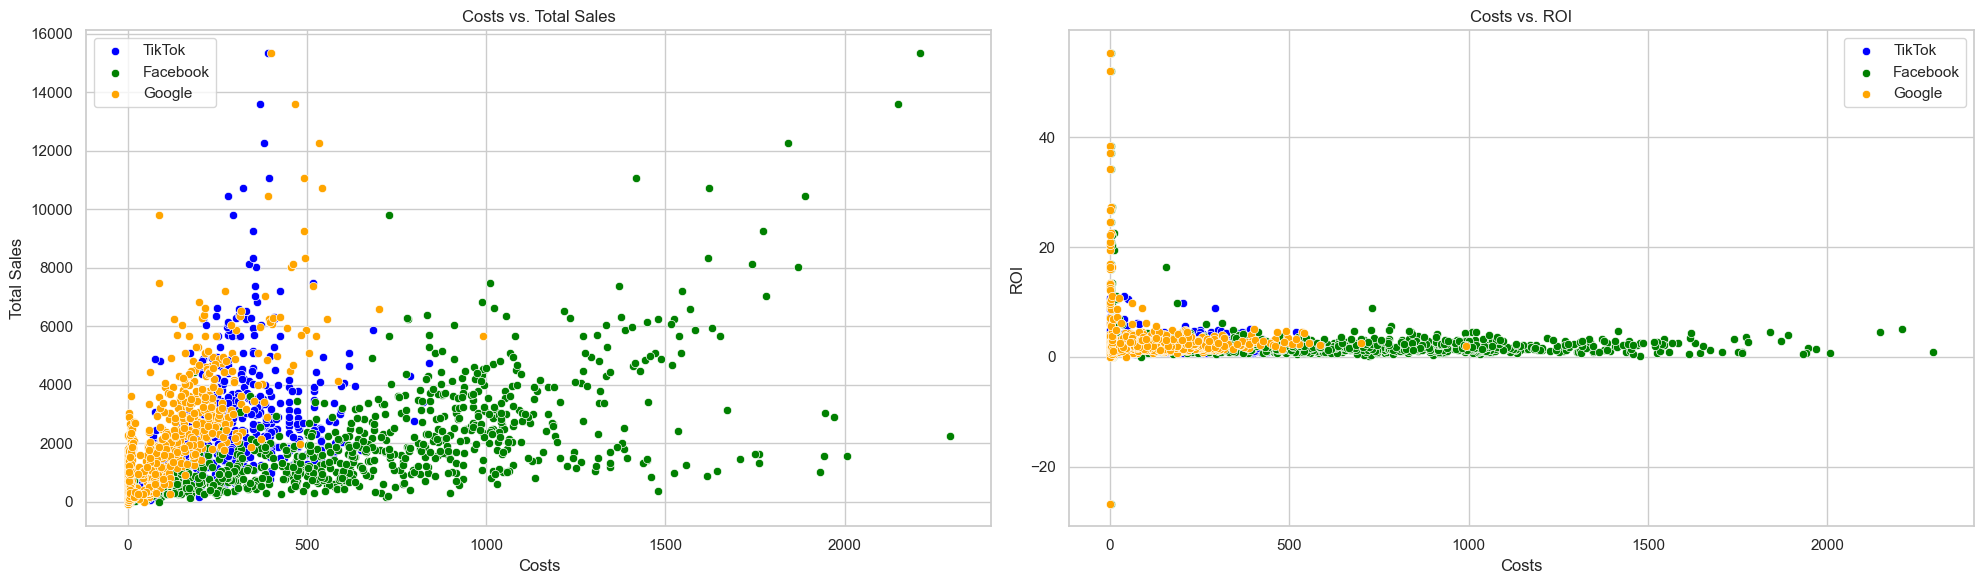

In [57]:
# Create the scatter plot using Seaborn
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)

# Set the style for the plot (optional)
sns.set(style="whitegrid")
sns.scatterplot(x='tt_costs', y='total_sales', data=df, label='TikTok', color='blue')
sns.scatterplot(x='fb_costs', y='total_sales', data=df, label='Facebook', color='green')
sns.scatterplot(x='google_costs', y='total_sales', data=df, label='Google', color='orange')
# Set plot title and labels
plt.title('Costs vs. Total Sales')
plt.xlabel('Costs')
plt.ylabel('Total Sales')
# Show legend
plt.legend()

plt.subplot(1,2,2)
# Set the style for the plot (optional)
sns.set(style="whitegrid")
sns.scatterplot(x='tt_costs', y='ROI', data=df, label='TikTok', color='blue')
sns.scatterplot(x='fb_costs', y='ROI', data=df, label='Facebook', color='green')
sns.scatterplot(x='google_costs', y='ROI', data=df, label='Google', color='orange')
# Set plot title and labels
plt.title('Costs vs. ROI')
plt.xlabel('Costs')
plt.ylabel('ROI')

# Show legend
plt.legend()

plt.tight_layout()
# Show the plot
plt.show()

## Costs vs. Total Sales explanation 

- keeping in mind that many data points were missing the best. platform to seem to influence total sales for lower costs is Google 

## Costs vs. ROI explanation 

- following the observation. from the Costs vs. Total Sales plot the ROI plot reassure us that the best platform for ROI is indeed Google

# Correlation observation 

In [ ]:
df_corr_filter_social_media_clicks=df[['orders', 'total_sales',
       'fb_clicks',  'google_clicks', 'tt_clicks', 'Total_Spend', 'ROI']]

In [ ]:

df_corr_clicks=df_corr_filter_social_media_clicks.corr()

In [ ]:
sns.heatmap(df_corr_clicks, cmap='PRGn')
plt.title('social media clicks corr to sale');

## Correlation explanation: social media impressions

It seems like ROI is negatively correlated with everything. Of course, it is negatively related to spending; interestingly, it seems like it is also negatively related to Facebook clicks.

Google clicks seem to be positively correlated with ROI of 0.2, which is also not much.
How much of the total sales It seems like Facebook and Google seem to be strongly positively correlated, with 0.6 and 0.8 correspondingly.

**(keep in mind the low amount of data points we have)

In [ ]:
df_corr_filter_social_media_imp=df[['orders', 'total_sales',
       'fb_impressions',  'google_impressions', 'tt_impressions', 'Total_Spend', 'ROI']]

df_corr_imp=df_corr_filter_social_media_imp.corr()
sns.heatmap(df_corr_imp, cmap='PuOr')
plt.title('social media impressions corr to sale');

## Correlation explanation: social media impressions
- Facebook impression seems to be the highest correlate to total sales yet negativly correlated to ROI
- google impression not seem to have much of an impact on ROI or sales
- tiktok impression also not seem to have an impact on total sale but a negative on ROI 
**(keep in mind the low amount of data points we have)

In [ ]:
df_corr_filter_social_media_CPC=df[['orders', 'total_sales',
       'fb_cpc',  'google_cpc', 'tt_cpc', 'Total_Spend_CPC', 'ROI']]

df_corr_CPC=df_corr_filter_social_media_CPC.corr()
sns.heatmap(df_corr_CPC, cmap='RdYlGn')
plt.title('social media CPC corr to sale');

In [ ]:
df_corr_filter_social_media_CPM=df[['orders', 'total_sales',
       'fb_cpm',  'google_cpm', 'tt_cpm', 'Total_Spend_CPM', 'ROI']]

df_corr_CPM=df_corr_filter_social_media_CPM.corr()
sns.heatmap(df_corr_CPM, cmap='Spectral')
plt.title('social media CPM corr to sale');

In [ ]:
df_corr_filter_social_media_costs=df[['orders', 'total_sales',
       'fb_costs',  'google_costs', 'tt_costs', 'Total_Spend', 'ROI']]

df_corr_cost=df_corr_filter_social_media_costs.corr()
sns.heatmap(df_corr_cost, cmap='RdGy')
plt.title('social media costs corr to sale');

## Correlation explanation: social media costs

- all the costs are negatively or not correlated to ROI which make some sense. 
- google costs and facebook costs are highly correlated to total sales 
**(keep in mind the low amount of data points we have)


In [ ]:
df_corr_filter_time=df[['Total_Spend', 'ROI','Jan_Season', 'holidays', 'Month_end_start', 'total_sales']]

In [ ]:
df_corr_time=df_corr_filter_time.corr()

In [ ]:
sns.heatmap(df_corr_time, cmap='coolwarm')
plt.title('time corr to sale');

## Correlation explanation: Seasonality costs

- the seasonality don't seem to have any impact on the total sales or ROI

# Monthly overview of the Data

In [ ]:


# Resample data by month and aggregate using sum (you can use other aggregation functions)
df_monthly = df.resample('M').sum()

df_monthly

In [ ]:
#mothly changes
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
# Plot the 'impressions' column
plt.plot(df_monthly.index, df_monthly['total_sales'], marker='o')

# Set plot title and labels
plt.title('DF Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')

plt.subplot(1,3,2)
# Plot the 'impressions' column
plt.plot(df_monthly.index, df_monthly['Total_Spend'], marker='o')

# Set plot title and labels
plt.title('Total Spend Monthly')
plt.xlabel('Date')
plt.ylabel('Total Spend')

plt.subplot(1,3,3)
# Plot the 'impressions' column
plt.plot(df_monthly.index, df_monthly['ROI'], marker='o')

# Set plot title and labels
plt.title('ROI Monthly')
plt.xlabel('Date')
plt.ylabel('ROI')
# Show the plot
plt.tight_layout()
plt.show()

The data presented here is no different than the plots above, just converted into a monthly overview.

# costs per clicks and 1000 impressions

In [ ]:


# Calculate mean values for costs, impressions, and clicks
google_mean_costs = np.mean(google_data['google_costs'])
fb_mean_costs = np.mean(fb_data['fb_costs'])
tt_mean_costs = np.mean(tt_data['tt_costs'])

google_mean_impressions = np.mean(google_data['google_cpm'])
fb_mean_impressions = np.mean(fb_data['fb_cpm'])
tt_mean_impressions = np.mean(tt_data['tt_cpm'])

google_mean_clicks = np.mean(google_data['google_cpc'])
fb_mean_clicks = np.mean(fb_data['fb_cpc'])
tt_mean_clicks = np.mean(tt_data['tt_cpc'])

# Create a DataFrame for the summarized data
data = {
    'Platform': ['Google', 'Facebook', 'Tiktok'],
    'Mean_Costs': [google_mean_costs, fb_mean_costs, tt_mean_costs],
    'Mean_CPM': [google_mean_impressions, fb_mean_impressions, tt_mean_impressions],
    'Mean_CPC': [google_mean_clicks, fb_mean_clicks, tt_mean_clicks]
}
summary_df_cpc_cpm = pd.DataFrame(data)

summary_df_cpc_cpm

In [ ]:

# Create the Seaborn visualization
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Mean Costs
sns.barplot(x="Platform", y="Mean_Costs", data=summary_df_cpc_cpm, color='blue', ax=axes[0])
axes[0].set_title("Mean Costs")

# Mean CPC
sns.barplot(x="Platform", y="Mean_CPC", data=summary_df_cpc_cpm, color='orange', ax=axes[1])
axes[1].set_title("Mean CPC")

# Mean CPM
sns.barplot(x="Platform", y="Mean_CPM", data=summary_df_cpc_cpm, color='green', ax=axes[2])
axes[2].set_title("Mean CPM")

plt.tight_layout()
plt.show()

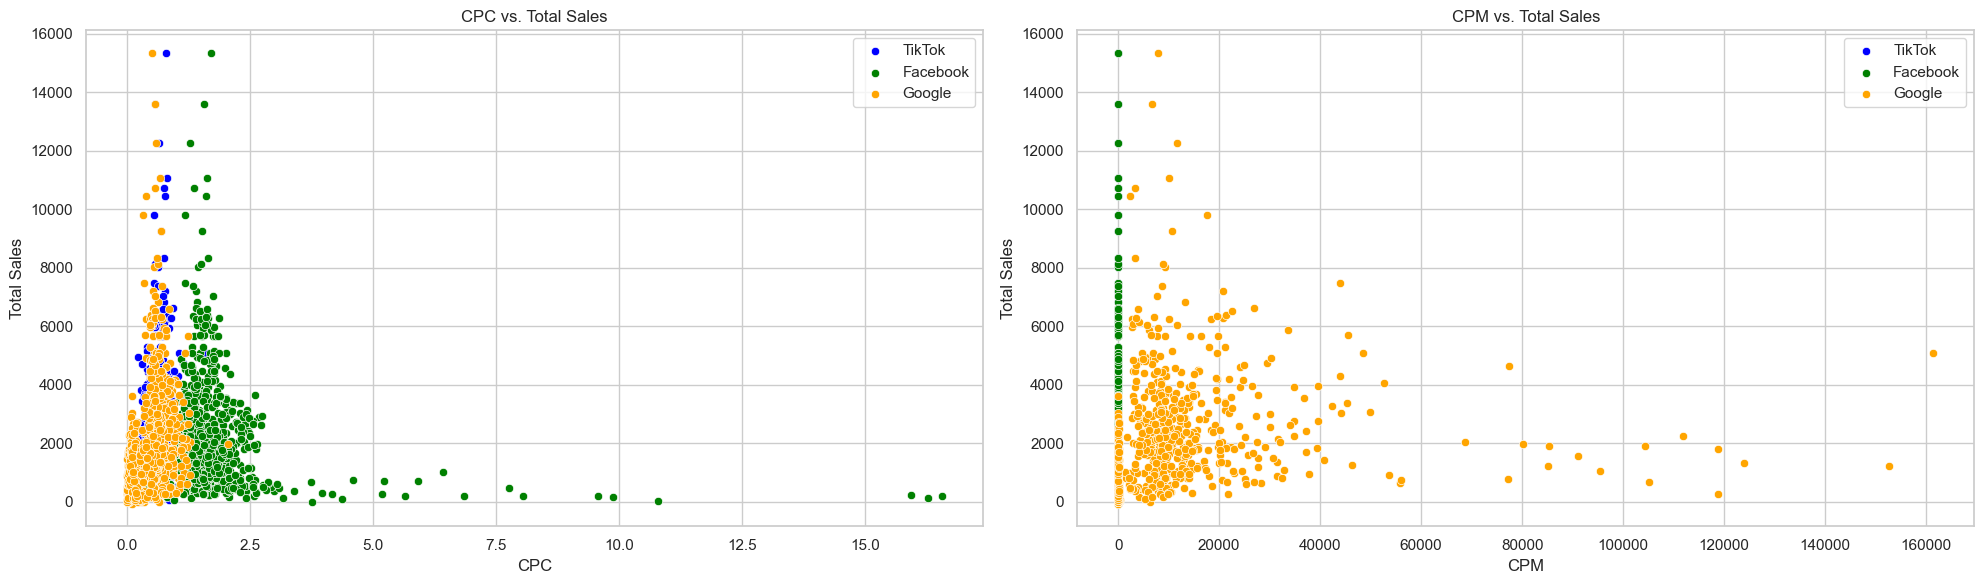

In [62]:
# Create the scatter plot using Seaborn
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)

# Set the style for the plot (optional)
sns.set(style="whitegrid")
sns.scatterplot(x='tt_cpc', y='total_sales', data=df, label='TikTok', color='blue')
sns.scatterplot(x='fb_cpc', y='total_sales', data=df, label='Facebook', color='green')
sns.scatterplot(x='google_cpc', y='total_sales', data=df, label='Google', color='orange')

# Set plot title and labels
plt.title('CPC vs. Total Sales')
plt.xlabel('CPC')
plt.ylabel('Total Sales')

# Show legend
plt.legend()

plt.subplot(1,2,2)
# Set the style for the plot (optional)
sns.set(style="whitegrid")
sns.scatterplot(x='tt_cpm', y='total_sales', data=df, label='TikTok', color='blue')
sns.scatterplot(x='fb_cpm', y='total_sales', data=df, label='Facebook', color='green')
sns.scatterplot(x='google_cpm', y='total_sales', data=df, label='Google', color='orange')

# Set plot title and labels
plt.title('CPM vs. Total Sales')
plt.xlabel('CPM')
plt.ylabel('Total Sales')

# Show legend
plt.legend()

plt.tight_layout()
# Show the plot
plt.show()

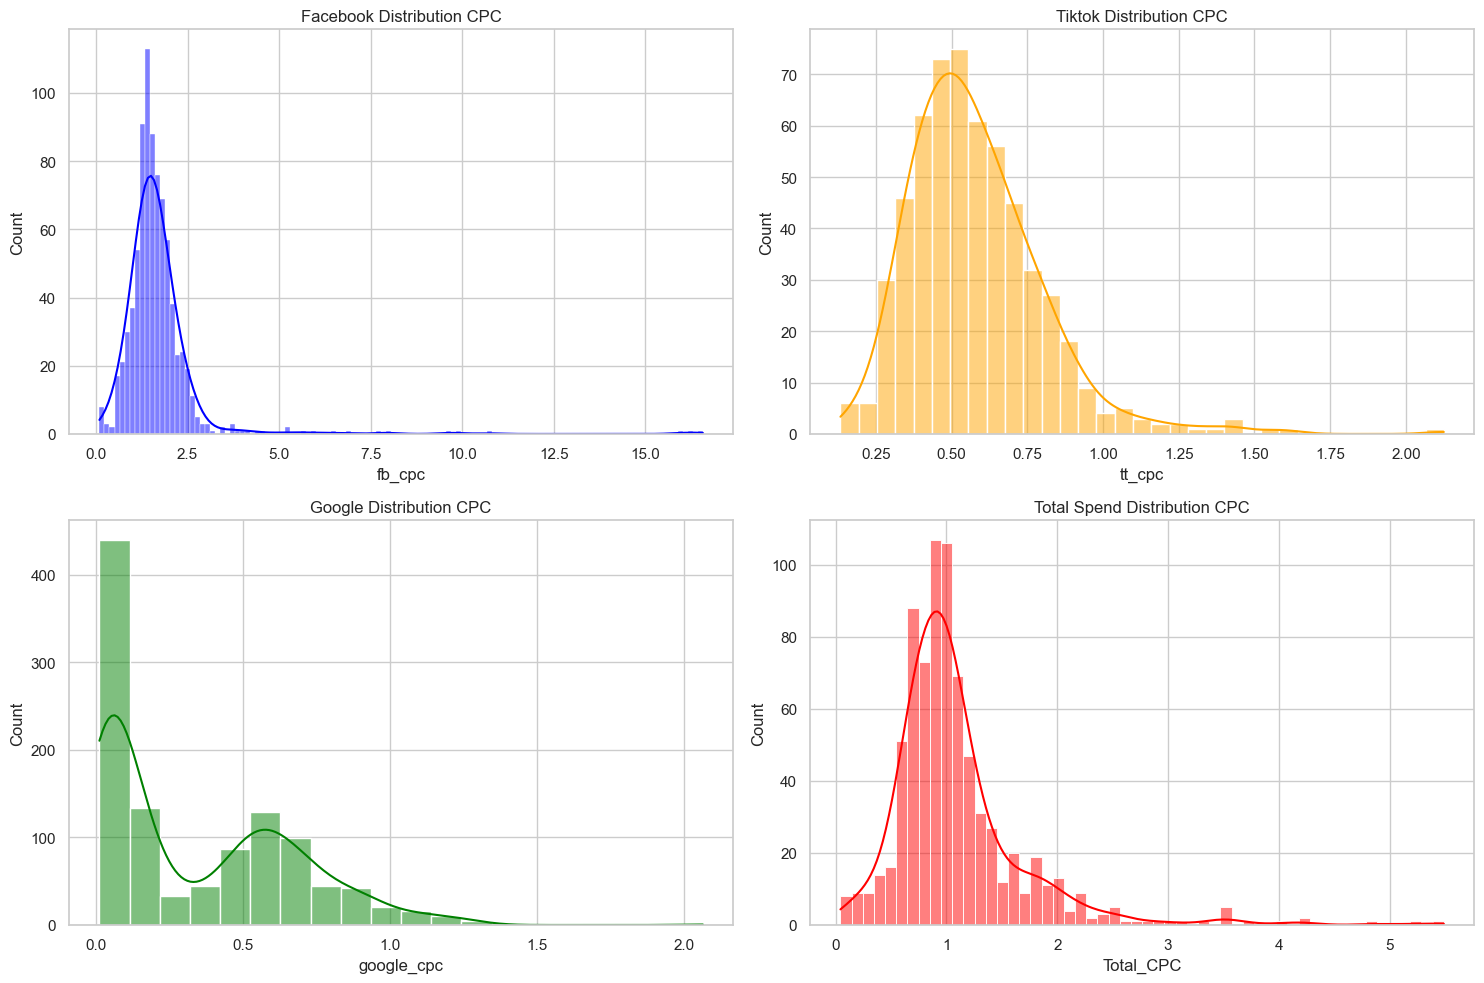

In [61]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# FB dist
sns.histplot(fb_data['fb_cpc'], color='blue', ax=axes[0, 0], kde=True)
axes[0, 0].set_title("Facebook Distribution CPC")

# TT dist
sns.histplot(tt_data['tt_cpc'], color='orange', ax=axes[0, 1], kde=True)
axes[0, 1].set_title("Tiktok Distribution CPC")

# Google dist
sns.histplot(google_data['google_cpc'], color='green', ax=axes[1, 0], kde=True)
axes[1, 0].set_title("Google Distribution CPC")

sns.histplot(df['Total_CPC'], color='red', ax=axes[1, 1], kde=True)
axes[1, 1].set_title("Total Spend Distribution CPC")

plt.tight_layout()
plt.show()

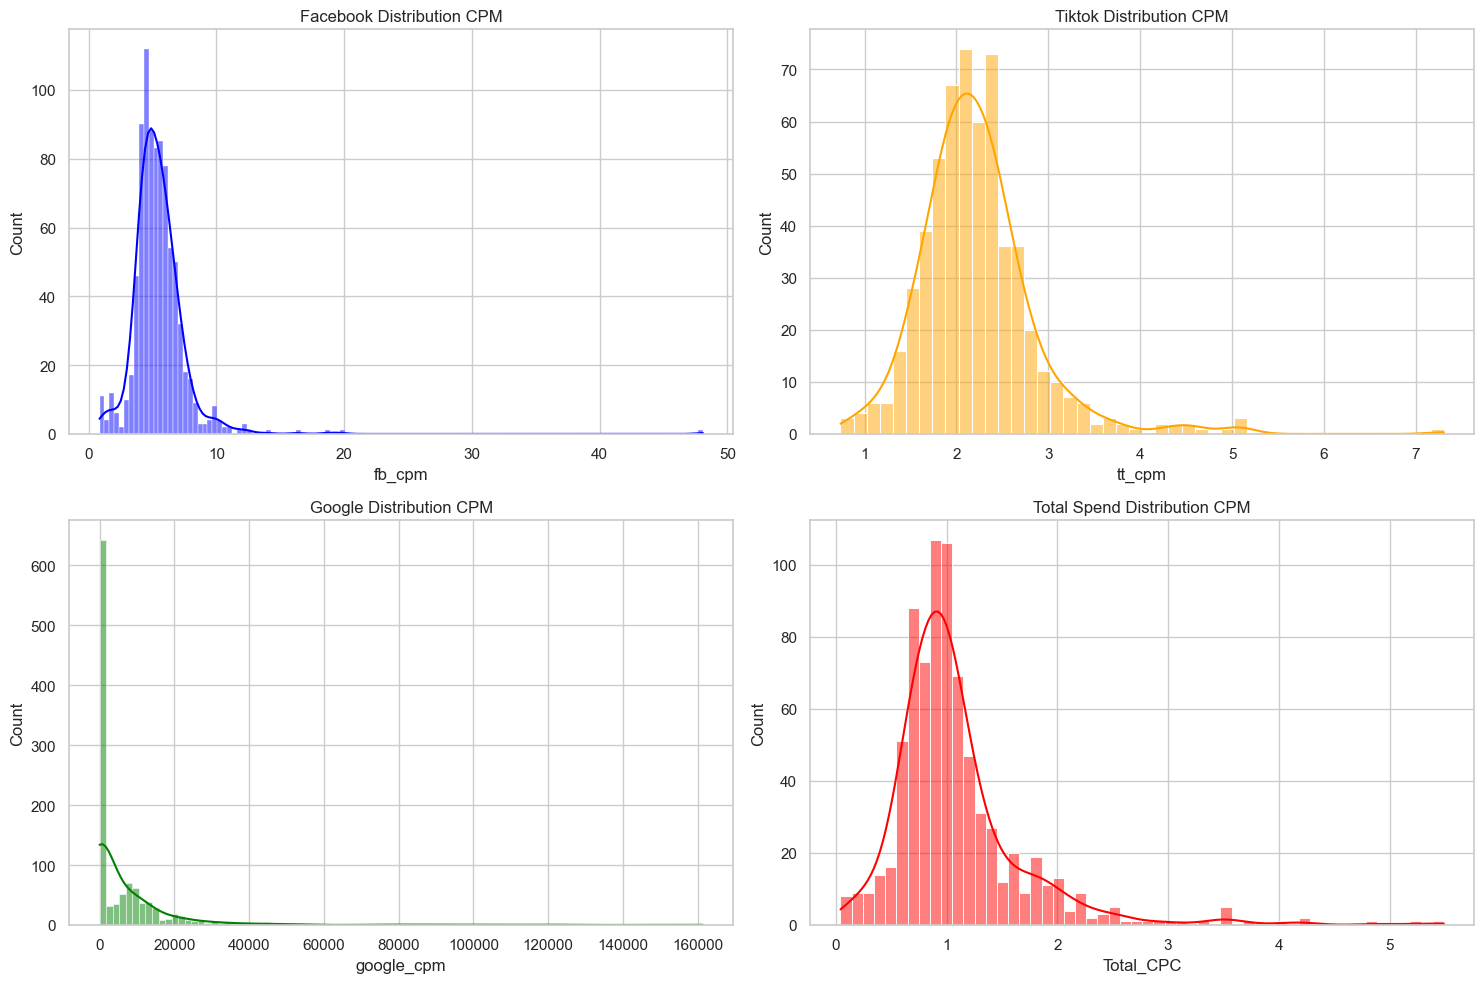

In [60]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# FB dist
sns.histplot(fb_data['fb_cpm'], color='blue', ax=axes[0, 0], kde=True)
axes[0, 0].set_title("Facebook Distribution CPM")

# TT dist
sns.histplot(tt_data['tt_cpm'], color='orange', ax=axes[0, 1], kde=True)
axes[0, 1].set_title("Tiktok Distribution CPM")

# Google dist
sns.histplot(google_data['google_cpm'], color='green', ax=axes[1, 0], kde=True)
axes[1, 0].set_title("Google Distribution CPM")

sns.histplot(df['Total_CPC'], color='red', ax=axes[1, 1], kde=True)
axes[1, 1].set_title("Total Spend Distribution CPM")

plt.tight_layout()
plt.show()

In [ ]:
tt_data.to_csv('../raw_data/01_tt_data.csv')

In [ ]:
fb_data.to_csv('../raw_data/01_fb_data.csv')

In [ ]:
google_data.to_csv('../raw_data/01_google_data.csv')

In [ ]:
df.to_csv('../raw_data/01_df.csv')

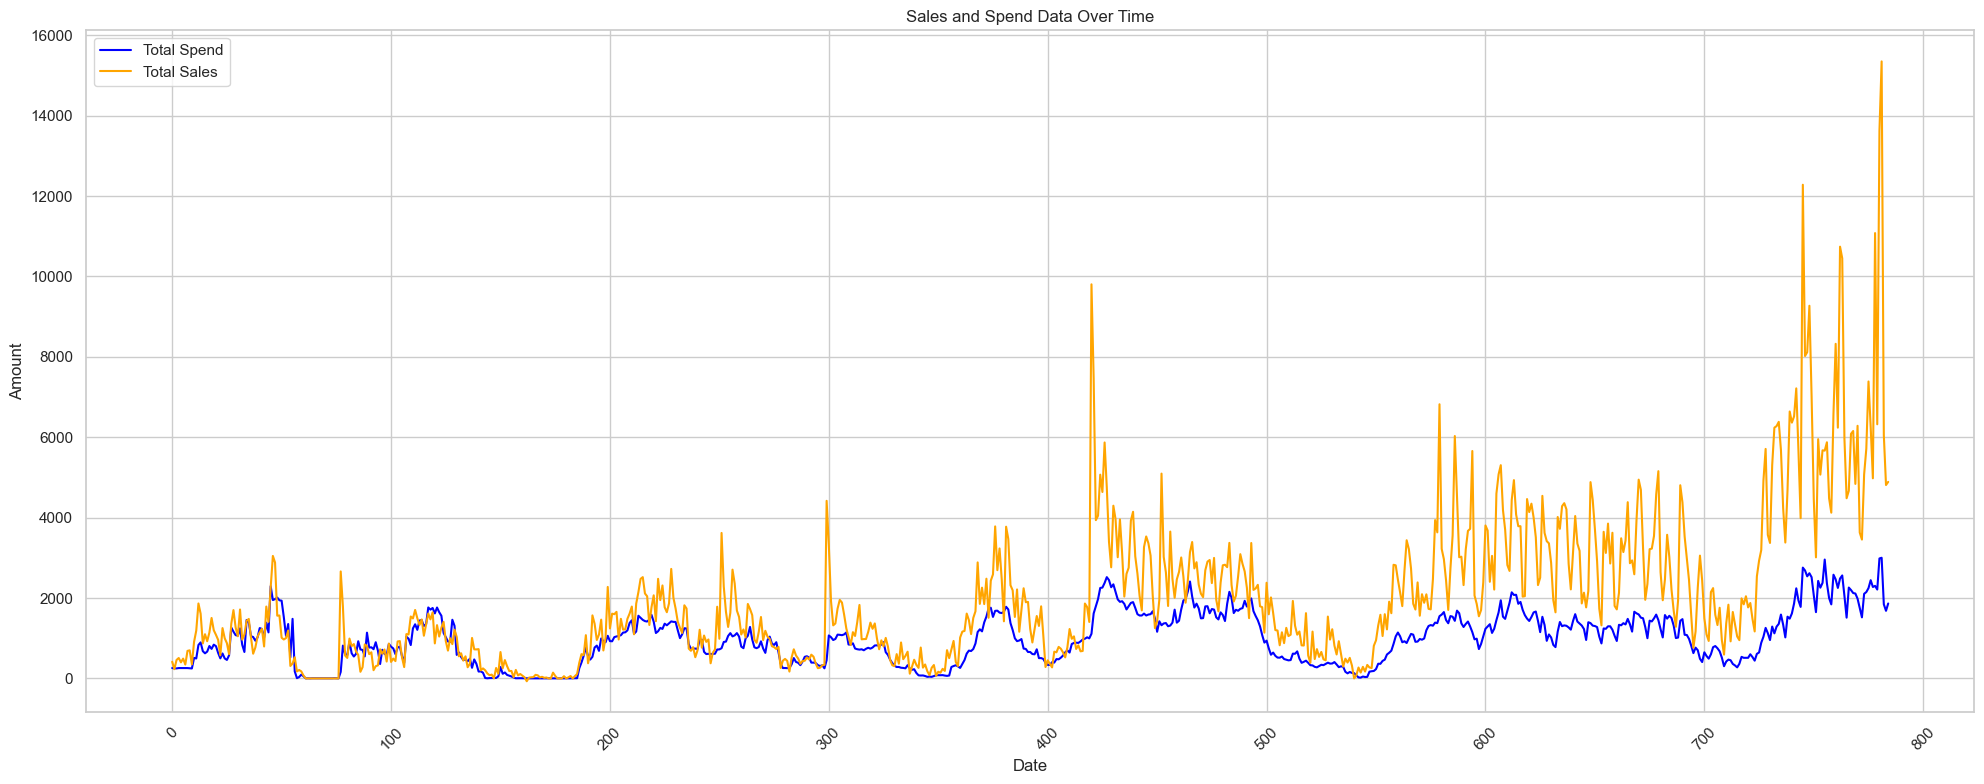

In [58]:
plt.figure(figsize=(20, 8)) 
sns.set(style="whitegrid")

plt.plot(df.index, df['Total_Spend'], linestyle='-', color='blue', label='Total Spend') 
plt.plot(df.index, df['total_sales'], linestyle='-', color='orange', label='Total Sales') 

plt.title('Sales and Spend Data Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')

plt.xticks(rotation=45)
plt.legend()  # Adding legend

plt.tight_layout()
plt.show()

In [ ]:
aug_2023_data_df = df[(df.index.year == 2023) & (df.index.month == 8)]


In [ ]:
aug_2023_data_df.columns

In [ ]:
(aug_2023_data_df.fb_costs/aug_2023_data_df.Total_Spend).mean()

In [ ]:
(aug_2023_data_df.google_costs/aug_2023_data_df.Total_Spend).mean()

In [ ]:
(aug_2023_data_df.tt_costs/aug_2023_data_df.Total_Spend).mean()

In [ ]:
df[total_impressions]

In [99]:
df_avg=df_avg.to_csv('../../raw_data/df_avg.csv')

In [122]:
df_avg_cpc_cpm=df_avg_cpc_cpm.to_csv('../../raw_data/df_avg_cpc_cpm.csv')